Mask R-CNN + FCN - Test on COCO Dataset - Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

# Setup Pipeline -  (build model and load weights)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# import matplotlib.pyplot as plt
# from   mpl_toolkits.mplot3d import Axes3D
# from importlib import reload
# reload(plt)
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_evaluate_pipeline, run_mrcnn_evaluate_pipeline, get_evaluate_batch
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset

Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.


In [3]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
# input_parms +=" --fcn_logs_dir   train_fcn8_bce " 
input_parms +=" --fcn_logs_dir   train_fcn8_l2_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --sysout         screen "
input_parms +=" --evaluate_method 1"
input_parms +=" --scale_factor    1"

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epoch                 1
   sysout                         SCREEN
   val_steps                      1




In [4]:
mrcnn_model, fcn_model = prep.build_fcn_evaluate_pipeline_newshapes(args = args,verbose = 1)

MODE IS: evaluate
build_mrcnn_inference_pipeline_newshapes MODE is : evaluate

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epoch                 1
   sysout                         SCREEN
   val_steps                      1




   FCN Block 41 shape is               :  (None, 16, 16, 512)
   FCN Block 42 shape is               :  (None, 16, 16, 512)
   FCN Block 43 shape is               :  (None, 16, 16, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 8, 8, 512)
   FCN Block 51 shape is               :  (None, 8, 8, 512)
   FCN Block 52 shape is               :  (None, 8, 8, 512)
   FCN Block 53 shape is               :  (None, 8, 8, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 4, 4, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 4, 4, 4096)
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
   FCN fully connected 2 (fc2) shape   :  (None, 4, 4, 4096)
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 4, 4, 7)  keras_tensor  True

   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)

    alt_scores_2                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_2(scattered)        :  shape: (1, 7, 100, 3)        KB.shape:(1, 7, 100, 3)        Keras Tensor: False
    alt_scores_2_norm(by_class)    :  shape: (1, 7, 100, 3)        KB.shape:(1, 7, 100, 3)        Keras Tensor: False
    alt_scores_2_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    fcn_scores_dense               :  shape: (?, 24)               KB.shape:(None, 24)            Keras Tensor: False
    seq_ids                        :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    sscatter_ids                   :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    fcn_scores_by_class            :  shape: (1, 7, 100, 24)       KB.shape:(1, 7, 100, 24)       Keras Tensor: False
    complete                       
    * fcn_heatmap sh

In [ ]:
# print("\nConfiguration Parameters:")
# print("-------------------------")
# for a in dir(fcn_config2):
#     if not a.startswith("__") and not callable(getattr(fcn_config2, a)):
#         print("{:30} {}    {}".format(a, getattr(fcn_config2, a) == getattr(fcn_model.config, a), getattr(fcn_config2, a), getattr(fcn_model.config, a) ))
# print("\n")

In [ ]:
mrcnn_model.config.display()

## Set weight files

In [5]:
# DIR_WEIGHTS = '/home/kbardool/models/train_fcn8_coco/fcn20181026T1432'

# filepath = os.path.join(DIR_WEIGHTS, 'fcn_init_weights')
# fcn_model.keras_model.save_weights(filepath, overwrite=True)
# fcn_model.save_model(DIR_WEIGHTS, 'fcn_init_weights')
# fcn_model.keras_model.summary()
##'fcn_init_weights.h5',
# DIR_WEIGHTS =  'F:/models/train_fcn8_bce/fcn20181205T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# DIR_WEIGHTS =  '/home/kbardool/models/train_fcn8_coco/fcn20181031T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
files   = ['fcn_0001.h5','fcn_0150.h5','fcn_0346.h5','fcn_0419.h5','fcn_0421.h5','fcn_0434.h5','fcn_0450.h5','fcn_0482.h5','fcn_0521.h5','fcn_0610.h5','fcn_0687.h5','fcn_0793.h5']

## Load Weights - 1

In [6]:
FILE_IDX = 1

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5 
FCN  MODEL Load weight file COMPLETE 


##  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
#     print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [ ]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### List trainable layers using `get_trainable_layers()`

In [ ]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

# Build test datasets

In [35]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --
# import pickle

with open("newshapes_dataset.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

In [36]:
dataset_test.display_active_class_info()

print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 7
1000


## Display Images

###  Display some images from dataset

<IPython.core.display.Javascript object>


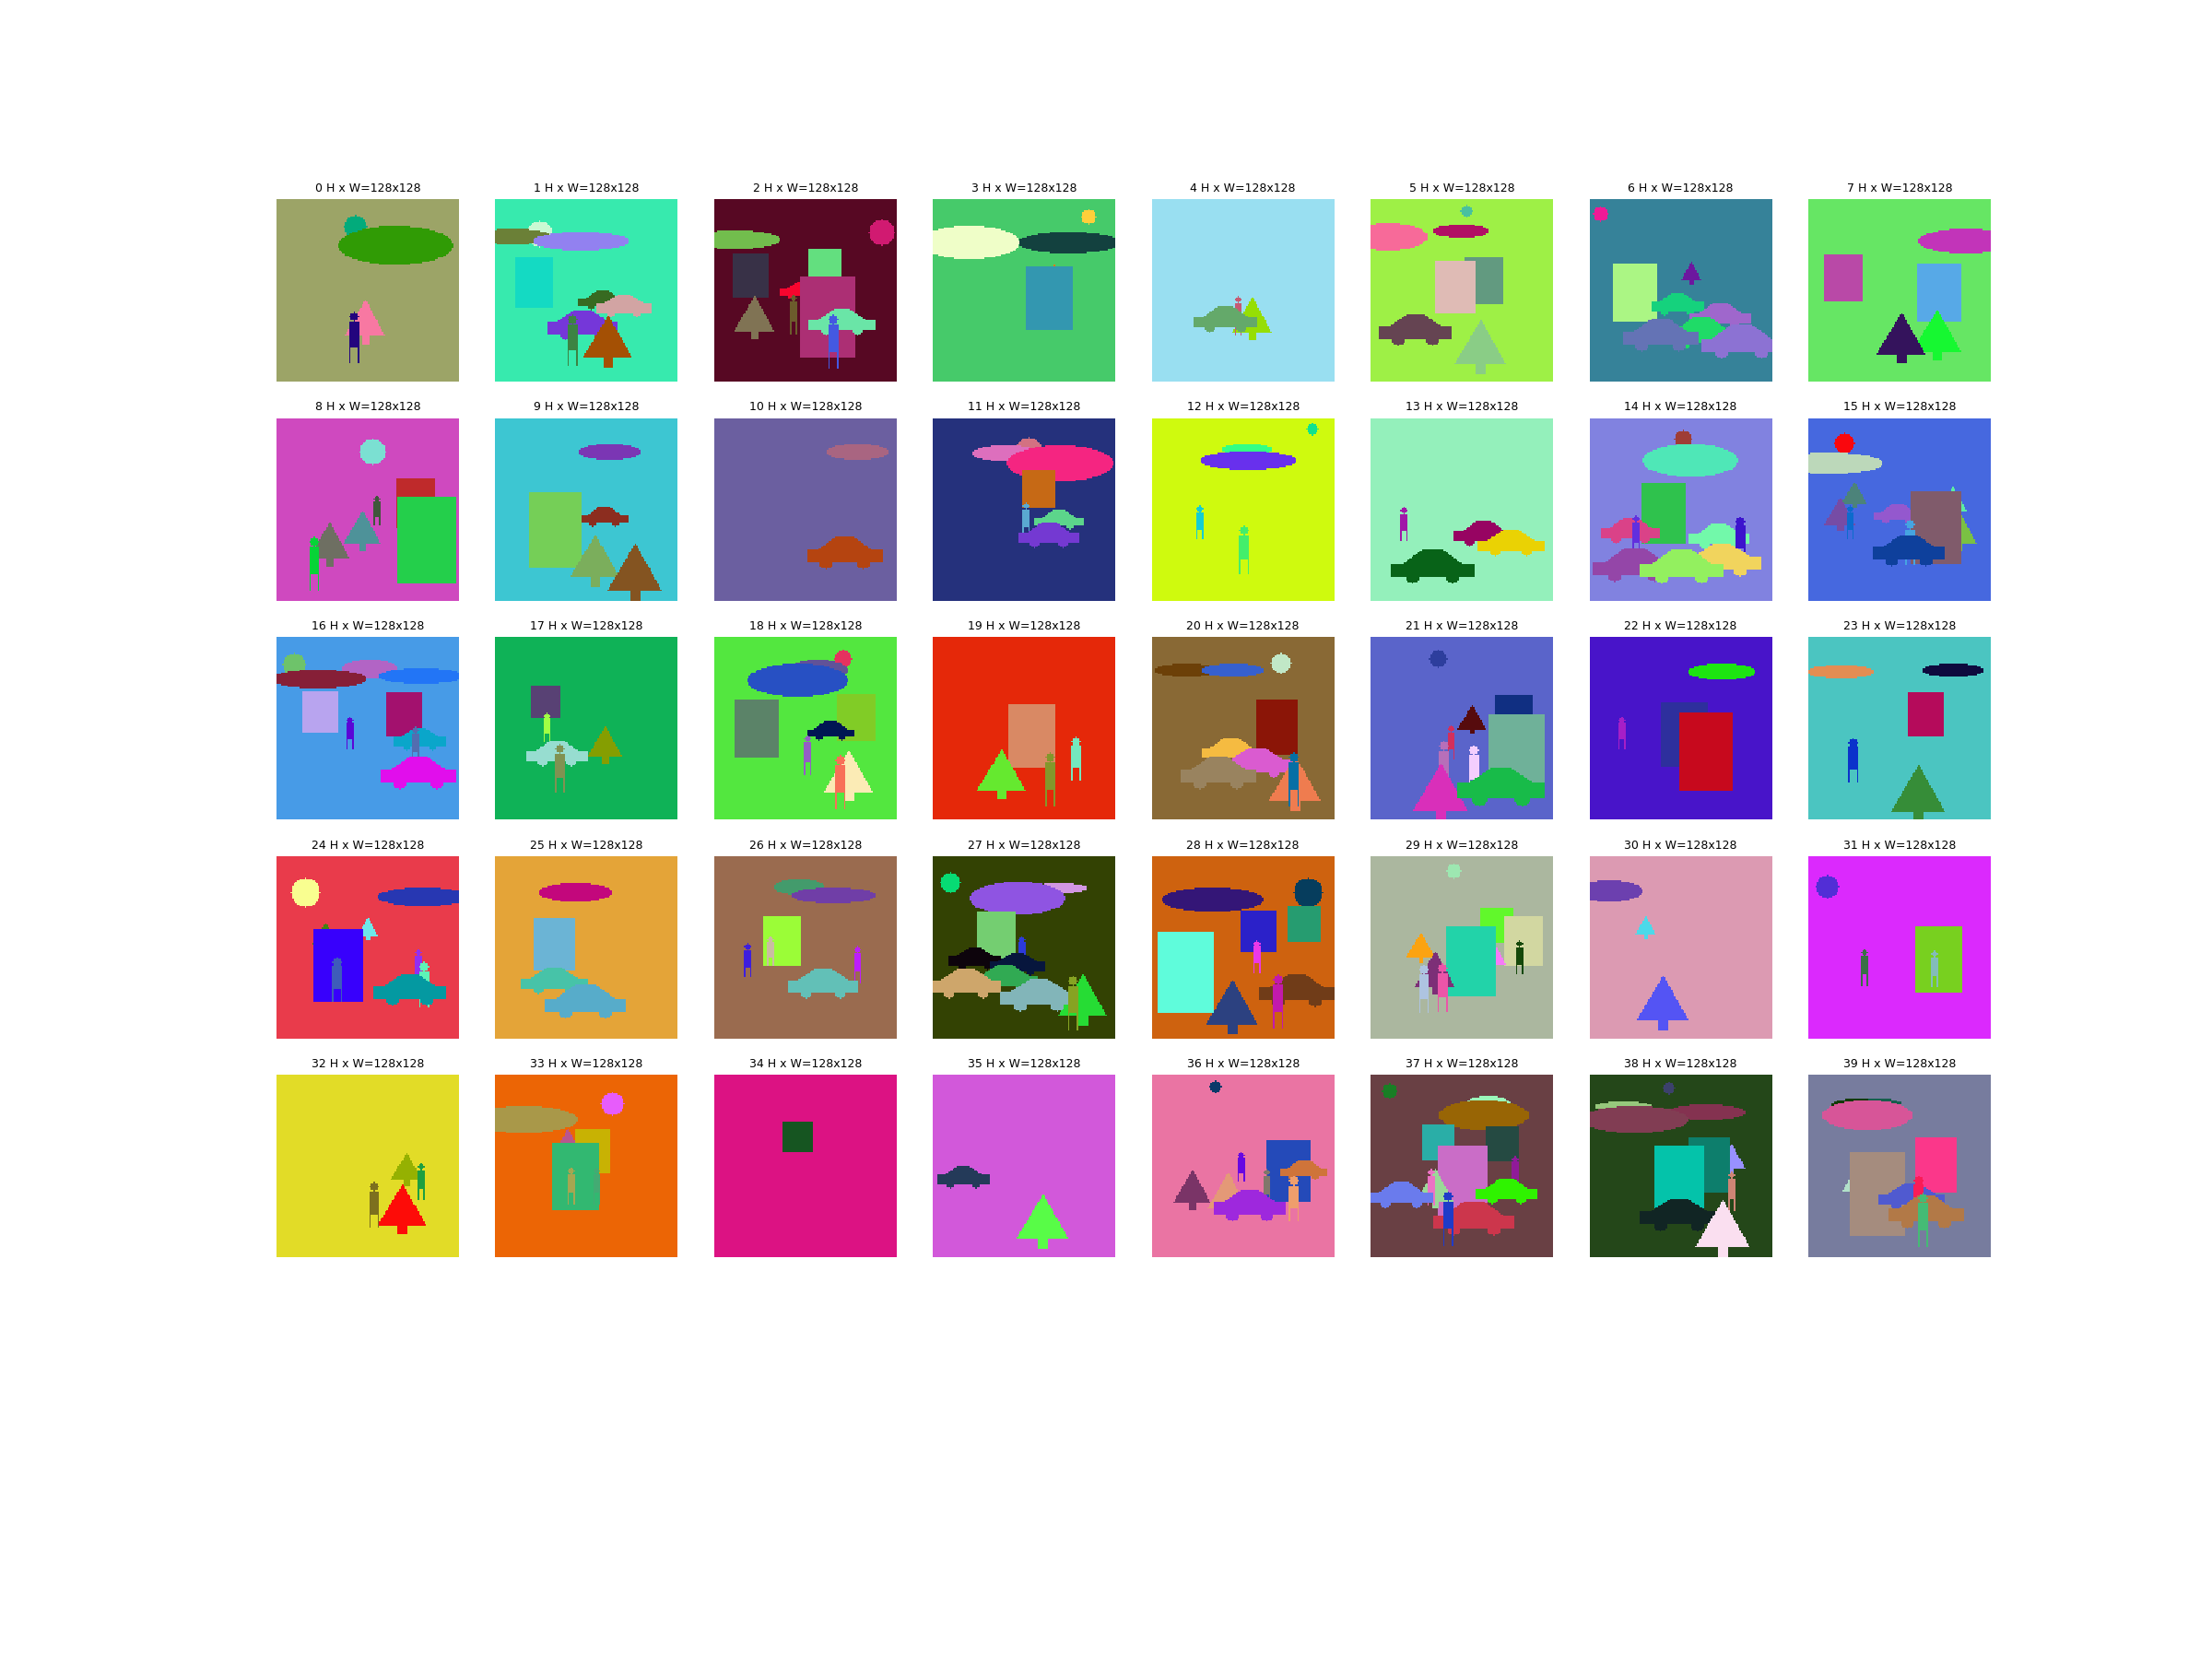

In [9]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

### Load using next(generator)

In [ ]:
test_batch_x, _ = next(test_generator)
display_training_batch(dataset_test, test_batch_x)
# dataset_train.display_annotation_info(0)

### Load a specific image using image_id -Display image with Ground Truth bounding boxes and masks

In [ ]:
IMAGE_LIST = [33]
# del images, train_batch_x
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, generator = train_generator )
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_ids = IMAGE_LIST)

# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_LIST)
# visualize.display_training_batch(dataset_train, train_batch_x)
# dataset_train.display_annotation_info(IMAGE_LIST)
 

In [ ]:
# import mrcnn.dataset as dataset
# img = dataset.load_image(7143)
# visualize.display_image(img)


# Run FCN evaluation pipeline

##  Run FCN detection pipeline on first image

### Load an image using `get_evaluate_batch()`

image id :  33
 Image_id    :  33  Reference:  [('sun', (231, 92, 251), (82, 20, 8, 8)), ('cloud', (169, 152, 73), (20, 31, 37, 9)), ('tree', (184, 86, 142), (51, 44, 8, 8)), ('building', (200, 178, 3), (68, 53, 12, 15)), ('building', (50, 184, 113), (56, 71, 16, 23)), ('person', (166, 166, 81), (53, 80, 2, 13)), ('person', (67, 171, 115), (71, 80, 2, 13))] Coco Id: 33
 Image meta  :  [ 33 128 128   3   0   0 128 128]
 Class ids   :  (7,)    [3 6 5 4 4 1 1]
 Class Names :  ['sun', 'cloud', 'tree', 'building', 'building', 'person', 'person']


<IPython.core.display.Javascript object>


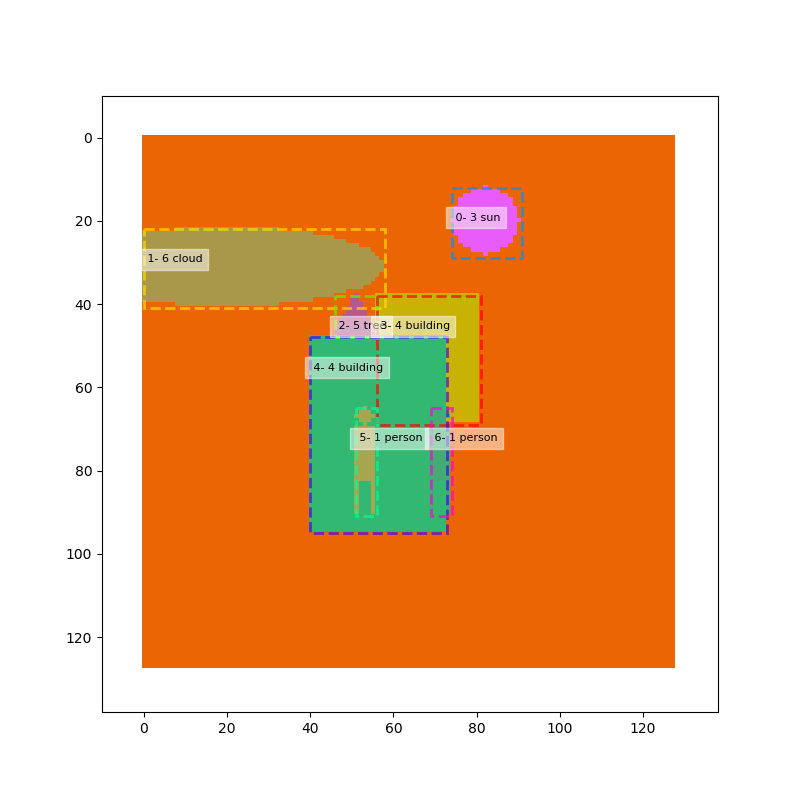

In [12]:
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, generator = test_generator, display = True)
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_ids = [33], display = True)
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, display = True)

###  Run `fcn_model.evaluate()`

In [13]:
fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose = 0)
print(' Complete')

 Max Overlap:  0.2280285
 Complete


In [14]:
fcn_results[0].keys()
for i, r in enumerate(fcn_results):
    print('\n output ', i, '  ',sorted(r.keys()))
    for key in sorted(r):
        print(key.ljust(20), r[key].shape)        


 output  0    ['class_ids', 'detection_ind', 'detections', 'fcn_hm', 'fcn_hm_scores', 'fcn_scores', 'fcn_scores_by_class', 'fcn_sm', 'gt_bboxes', 'gt_class_ids', 'image', 'image_meta', 'molded_image', 'molded_rois', 'pr_hm', 'pr_hm_scores', 'pr_scores', 'pr_scores_by_class', 'rois', 'scores']
class_ids            (14,)
detection_ind        (14,)
detections           (100, 7)
fcn_hm               (128, 128, 7)
fcn_hm_scores        (7, 100, 24)
fcn_scores           (14, 24)
fcn_scores_by_class  (7, 100, 24)
fcn_sm               (128, 128, 7)
gt_bboxes            (100, 4)
gt_class_ids         (100,)
image                (128, 128, 3)
image_meta           (15,)
molded_image         (128, 128, 3)
molded_rois          (14, 4)
pr_hm                (128, 128, 7)
pr_hm_scores         (7, 100, 24)
pr_scores            (14, 24)
pr_scores_by_class   (7, 100, 24)
rois                 (14, 4)
scores               (14,)


### Display FCN detections

In [28]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [ ]:
# f = fcn_results[0]
# print(f['detections'][:20])
# # print(f['gt_bboxes'][:20])
# print(f['gt_class_ids'])

#### Display MRCNN results - 1st style

In [29]:
lmt =17
f = fcn_results[0]

names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in f['class_ids'][:lmt]])
print('            classes :', f['class_ids'][:lmt])
print('                    : ', names)
print('                    :', f['detection_ind'][:lmt])
print('          bbox area :', f['pr_scores'][:lmt,10])
print('          clip area :', f['pr_scores'][:lmt,13])
print()
print('        orig scores :', f['scores'][:lmt])
print('        norm scores :', f['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', f['pr_scores'][:,5])

print('-'*185)
print('         pr_scrs[8] :', f['pr_scores'][:lmt,11])
print('      fcn_scores[8] :', f['fcn_scores'][:lmt,11])
print()
print('      pr_scores[13] :', f['pr_scores'][:lmt,14])
print('     fcn_scores[13] :', f['fcn_scores'][:lmt,14])
print()

print('      pr_scores[19] :', f['pr_scores'][:lmt,20])
print('     fcn_scores[19] :', f['fcn_scores'][:lmt,20])
print()

print(' norm pr_scores[17] :', f['pr_scores'][:lmt,17])
print('norm fcn_scores[17] :', f['fcn_scores'][:lmt,17])
print()
print(' norm pr_scores[23] :', f['pr_scores'][:lmt,23])
print('norm fcn_scores[23] :', f['fcn_scores'][:lmt,23])


            classes : [         3          3          6          6          5          5          4          4          4          4          1          1          1          1]
                    :         sun        sun      cloud      cloud       tree       tree   building   building   building   building     person     person     person     person
                    : [        -1          1         -1          1         -1          1         -1         -1          1          1         -1         -1          1          1]
          bbox area : [  289.0000   289.0000  1102.0000  1102.0000   100.0000   100.0000  1551.0000   775.0000  1551.0000   775.0000   130.0000   130.0000   130.0000   130.0000]
          clip area : [   36.0000    36.0000    77.0000    77.0000    25.0000    25.0000    90.0000    64.0000    90.0000    64.0000    32.0000    32.0000    32.0000    32.0000]

        orig scores : [    0.9898     0.9898     0.9827     0.9827     0.9749     0.9749     0.9582     0.9582

In [30]:
mrcnn_model.class_pred_stats

{'avg': [0.0, 0.936, 0.9476, 0.9898, 0.9582, 0.9749, 0.9827],
 'pct': [[0.0, 0.0, 0.0],
  [0.972, 0.9978, 0.9995],
  [0.9984, 0.9998, 0.9999],
  [0.9992, 0.9996, 0.9998],
  [0.9984, 0.9999, 1.0],
  [0.9969, 0.9995, 0.9998],
  [0.9972, 0.9994, 0.9998]]}

####  Display MRCNN scores - 2nd style

In [31]:
f = fcn_results[0]
for i, [molded_bbox, cls, scr, pr_scr, fcn_scr] in enumerate(zip(f['molded_rois'].astype(np.int), f['class_ids'],  f['scores'], f['pr_scores'], f['fcn_scores'])):
    
    print('{} {} {:2d}  {:.<18s}  {:5.4f} {}  '.format(i, molded_bbox, cls, dataset_test.class_names[cls], scr, fcn_scr[[4,5,6,7,8]]))
    print('{:>86s} {}'.format(' mrcnn old style scores:  ',  pr_scr[[9,10,11]]))
    print('{:>86s} {}'.format('   fcn old style scores:  ', fcn_scr[[9,10,11]]))
    print()
    print('{:>86s} {}'.format('      mrcnn alt scores1:  ', pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format('        fcn alt scores1:  ', fcn_scr[[12,13,14,15,16,17]]))
    print()
    print('{:>86s} {}'.format('          mrcnn_scores2:  ', pr_scr[[18,19,20,21,22,23]]))
    print('{:>86s} {}'.format('            fcn_scores2:  ', fcn_scr[[18,19,20,21,22,23]]))
    print()

0 [        99         37        116         54]  3  sun...............  0.9898 [    3.0000     0.9898    -1.0000   100.0000     1.0000]  
                                                             mrcnn old style scores:   [    0.9923   289.0000     0.9923]
                                                               fcn old style scores:   [    7.2293   289.0000     7.2293]

                                                                  mrcnn alt scores1:   [   24.7438    36.0000     0.6873     1.0000     1.0000     1.0000]
                                                                    fcn alt scores1:   [    1.5023    36.0000     0.0417     1.0000     1.0000     1.0000]

                                                                      mrcnn_scores2:   [   24.7438    36.0000     0.6873     1.0000     1.0000     1.0000]
                                                                        fcn_scores2:   [   13.3960    36.0000     0.3721     1.0000     1.0000     1.00

####  Display MRCNN scores - 3rd style

In [32]:
# r = results[0]
print(f['detections'].shape)
print('   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))')
print('  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  ')
sort_by_class_order = np.argsort(f['class_ids'])


# for i in range(len( f['class_ids'])):
for i in sort_by_class_order:
#     print(i , f['rois'][i].astype(np.float), f['scores'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
#     print(i , f['detections'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
    det_type = '       --> ADDED FP ' if f['pr_scores'][i,6] == -1 else '      Original detection'
    print(i , f['rois'][i])
    print(i , f['pr_scores'][i,:9], f['pr_scores'][i,4], class_names[ f['pr_scores'][i,4].astype(np.int)], det_type) 
    print()
    print(i , 'pr: old_scores [9,10,11]:  '.rjust(90), f['pr_scores'][i,9:12])    
    print(i , '  alt_scores 1 [12 - 17]:  '.rjust(90), f['pr_scores'][i,12:18])    
    print(i , '  alt_scores 2 [18 - 23]:  '.rjust(90), f['pr_scores'][i,18:24])    
    print(i)
#     print(i , f['fcn_scores'][i,:8], f['fcn_scores'][i,4], class_names[ f['fcn_scores'][i,4].astype(np.int)])    
    print(i , 'fcn: old_scores [9,10,11]:  '.rjust(90), f['fcn_scores'][i,9:12])    
    print(i ,  '  alt_scores 1 [12 - 17]:  '.rjust(90), f['fcn_scores'][i,12:18])    
    print(i ,  '  alt_scores 2 [18 - 23]:  '.rjust(90), f['fcn_scores'][i,18:24])    
    print()
    print(i , '  old score [11]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,11],f['fcn_scores'][i,11]))
    print(i , 'alt score 1 [14]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,14],f['fcn_scores'][i,14]))
    print(i , 'alt score 2 [20]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,20],f['fcn_scores'][i,20]))
    print()

(100, 7)
   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))
  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  
10 [        37         54         63         59]
10 [   37.0000    54.0000    63.0000    59.0000     1.0000     0.9360    -1.0000    90.0000     1.0000] 1.0 person        --> ADDED FP 

10                                                                pr: old_scores [9,10,11]:   [    0.8738   130.0000     0.8738]
10                                                                  alt_scores 1 [12 - 17]:   [   19.5959    32.0000     0.6124     1.0000     1.0000     1.0000]
10                                                                  alt_scores 2 [18 - 23]:   [   19.5959    32.0000     0.6124     1.0000     1.0000     1.0000]
10
10                                                               fcn: old_scores [9,10,11]:   [    3.4506   130.0000     3.4506]
10                                                       

### Display detections on Image

[         0          1          3          4          5          6]
[         1          3          4          5          6]
Image Meta:  [        33        128        128          3          0          0        128        128          1          1]


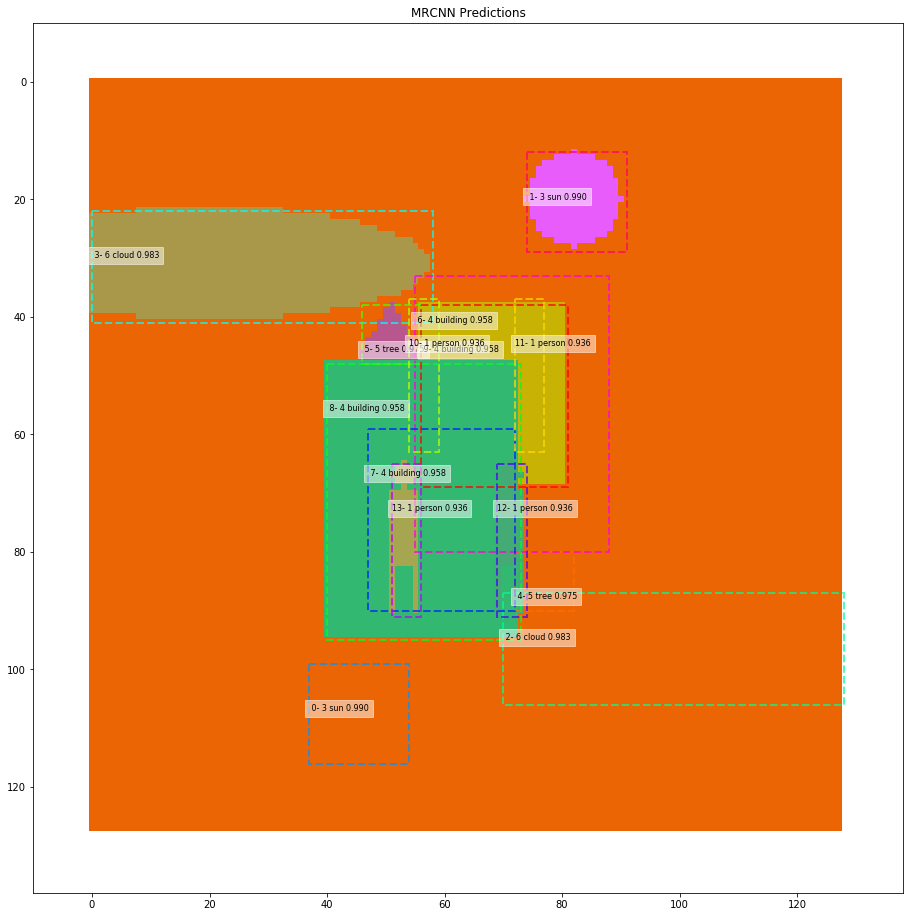

In [17]:
f = fcn_results[0]
print(np.unique(f['gt_class_ids']))
print(np.unique(f['class_ids']))
print('Image Meta: ', f['image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'],
#                            only_classes=[6],
                            title="MRCNN Predictions", score_range=(0.0, 1.7))
#  only_classes=[27],

In [ ]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
from mrcnn.utils import log # Display results
# ax = visualize.get_ax(rows =1, cols = 1, size= 20)
f = fcn_results[0]
clses = [6]
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
print('Image Meta: ', f['image_meta'][:10])
# visualize.display_instances_from_prscores(f['image'], f['pr_scores'], class_names, score_range=(-999, 9999), only_classes = [1])
# visualize.display_instances(f['image'], f['rois'],  f['class_ids'], class_names, f['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
# visualize.display_instances(f['image'], f['rois'], f['class_ids'], class_names, f['scores'], title="Predictions - Orig Score", score_range=(0.0, 1.99), size = 24, only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,11], f['fcn_scores'][:,11],title="Predictions - Alt Score 0 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,14], f['fcn_scores'][:,14],title="Predictions - Alt Score 1 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,20], f['fcn_scores'][:,20],title="Predictions - Alt Score 2 ", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,17], f['fcn_scores'][:,17],title="Predictions - Alt Score 1 (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,23], f['fcn_scores'][:,23],title="Predictions - Alt Score 2 (Normalized by class)", only_classes=clses)


#### Display Img with GT bboxes

 Image_id    :  33  Reference:  [('sun', (231, 92, 251), (82, 20, 8, 8)), ('cloud', (169, 152, 73), (20, 31, 37, 9)), ('tree', (184, 86, 142), (51, 44, 8, 8)), ('building', (200, 178, 3), (68, 53, 12, 15)), ('building', (50, 184, 113), (56, 71, 16, 23)), ('person', (166, 166, 81), (53, 80, 2, 13)), ('person', (67, 171, 115), (71, 80, 2, 13))] Coco Id: 33
 Image meta  :  [        33        128        128          3          0          0        128        128          1          1]
 Class ids   :  (7,)    [         3          6          5          4          4          1          1]
 Class Names :  ['sun', 'cloud', 'tree', 'building', 'building', 'person', 'person']


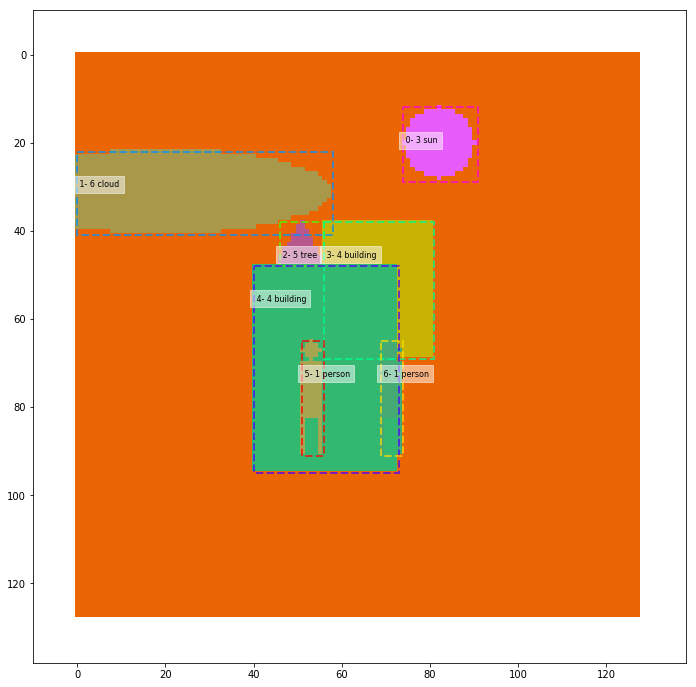

In [19]:
visualize.display_image_gt(dataset_test, mrcnn_model.config, [33] ,
#                            only_classes=[44,46] 
                          )

### Compute mAP and Display Precision/Recall Curve

In [ ]:
visualize.plot_precision_recall_compare(fcn_results)

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# # Draw precision-recall curve
f = fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,norm_score])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Normlzd Score")

# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_0])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 0 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_0])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 0 ")

# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_1])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 1 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_1])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 1 ")


# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_2])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 1 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_2])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 1 ")

##  Run MRCNN detection pipeline on second image

In [ ]:
from mrcnn.prep_notebook import get_evaluate_batch
# from mrcnn.prep_notebook import get_training_batch, get_inference_batch, get_evaluate_batch
IMAGE_LIST = [4745]
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, generator = test_generator, display = True)
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, IMAGE_LIST, display = True)

In [ ]:
fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =0)

### Display detections on Image

In [ ]:
f = fcn_results[0]
print('Image Meta: ', f['image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'], title="MRCNN Predictions", score_range=(0.0, 0.7))
#  only_classes=[27],

In [ ]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
from mrcnn.utils import log # Display results
# ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = fcn_results[0]
clses = [42]
class_ids = np.unique(r['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
print('Image Meta: ', r['image_meta'][:10])

# visualize.display_instances(r['image'], r['rois'],  r['class_ids'], class_names, r['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], class_names, r['scores'], title="Predictions", score_range=(0.0, 0.99), only_classes= [42], size = 24)
# visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,11], r['fcn_scores'][:,11],title="Predictions", only_classes=clses,size = 24)
visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,14], r['fcn_scores'][:,14],title="Predictions", only_classes=clses,size = 24)
visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,20], r['fcn_scores'][:,20],title="Predictions", only_classes=clses,size = 24)

### Compute mAP and Display Precision/Recall Curve

In [ ]:
old_score   = 11
alt_score_1 = 14
alt_score_2 = 20
# Draw precision-recall curve
f = fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_score_1])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_score_1])
visualize.plot_precision_recall(AP, precisions, recalls)

##  Run MRCNN detection pipeline on third image

### Load image using `get_evaluate_batch()`

In [ ]:
# 13378, 33816
image, _ = get_inference_batch(dataset_test, mrcnn_model, 13378, display=True)    

In [ ]:
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_id=13378, verbose = 0)
r = results[0]

In [ ]:
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                             title="Predictions", score_range=(0.0, 0.7))


#  Compute AP routine

In [ ]:
from mrcnn.utils import trim_zeros, compute_overlaps
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    gt_class_ids = trim_zeros(np.expand_dims(gt_class_ids, axis = -1))
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest
#     print('arg_sort indicies:', indices)
    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]
    print(gt_boxes.shape, gt_class_ids.shape)
    print(pred_boxes.shape, pred_class_ids.shape, pred_scores.shape)
    print('ground truth:')
    print(np.concatenate([gt_boxes,gt_class_ids], axis = -1))    
    print('predcitions:')
    print(np.concatenate([pred_boxes,np.expand_dims(pred_class_ids, axis = -1), np.expand_dims(pred_scores, axis = -1)], axis = -1))
    print(' Total predicitons: ' , len(pred_scores))
    
    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    print('overlaps: ',overlaps.shape)
    print(overlaps)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break
    print(' after overlap computation')
    print('match count:', match_count)
    print('pred_match :', pred_match)
    print('  gt_match :', gt_match)
    
    # Compute precision and recall at each prediction box step
    # Precision = TP / (TP+FP)      Recall = TP / (TP + FN)
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    
    print(' precisions')
    print(np.cumsum(pred_match), '/', (np.arange(len(pred_match)) + 1))
    print(precisions)
    print()
    print(' recalls ')
    print(np.cumsum(pred_match), '/', len(gt_match))
    print(recalls)
    print()
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])
    print('appended [0/0], [0/1] to front/end of precisions/recalls')
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    
    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    print('backtracking precsiosn values:', list(range(len(precisions) - 2, -1, -1)))
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    # Compute mean AP over recall range
    print(' Rc[:-1] : ', recalls[:-1])
    print(' Rc[1:]  : ', recalls[1:])
    print(' Pr[1:]  : ', precisions[1:])
    print()

    ## find points where recall values changes 
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) * precisions[indices])
    
    print('where recalls[:-1] != recalls[1:]:', np.where(recalls[:-1] != recalls[1:]))
    print('indices at recall changes : ', indices)
    print(' A1: recall[indices]  : ', recalls[indices])
    print(' A2: recall[indices-1]: ', recalls[indices-1])
    print(' A1 - A2              : ', (recalls[indices] - recalls[indices - 1]))
    print(' P1:precision[indices]: ', precisions[indices])
    print(' (A1-A2)*P1           : ', (recalls[indices] - recalls[indices - 1]) * precisions[indices])
    print(' Sum = mAP            : ', mAP)
    print(' Pr        : ', precisions)
    print(' Rc        : ', recalls)
    print(' Pr*Rc     : ', precisions*recalls)
    print(' Sum(Pr*Rc): ', np.sum(precisions*recalls))
    print(' Sum(Pr*Rc)/m: ', np.sum(precisions*recalls)/len(precisions))
    return mAP, precisions, recalls, overlaps

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# AP, precisions, recalls, overlaps = compute_ap(gt_data[0]['gt_bbox'], gt_data[0]['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
f = fcn_results[0]
print(f['gt_bboxes'].shape, f['gt_class_ids'].shape)
AP, precisions, recalls, overlaps = compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,orig_score])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")

In [ ]:
len(precisions)
precisions


In [ ]:
f = fcn_results[0]
f.keys()

# Display Heatmaps

In [12]:
# from mrcnn.visualize import (plot_one_bbox_heatmap, 
#                              plot_3d_heatmap, plot_2d_heatmap, 
#                               plot_2d_heatmap_compare, plot_3d_heatmap_compare)
# import matplotlib as plt
img_id = 0
f= fcn_results[img_id]
image_id=f['image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])

coco_class_names = dataset_test.class_names
gt_class_ids = np.unique(f['gt_class_ids']).astype(int).tolist()
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('  GT class ids: ', gt_class_ids)
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

Image id:  33  Coco ID:  33
[3. 3. 6. 6. 5. 5. 4. 4. 4. 4. 1. 1. 1. 1.]
  GT class ids:  [0, 1, 3, 4, 5, 6]
Pred class ids:  [1, 3, 4, 5, 6]
FCN  class ids:  [1, 3, 4, 5, 6]


## Overlay images with heatmaps

### Overlay image with pred_heatmaps

class ids:  [1, 3, 4, 5, 6]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 7)  Bounding boxes shape:  (7, 100, 24)
Display classes: [1, 3, 4, 5, 6]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


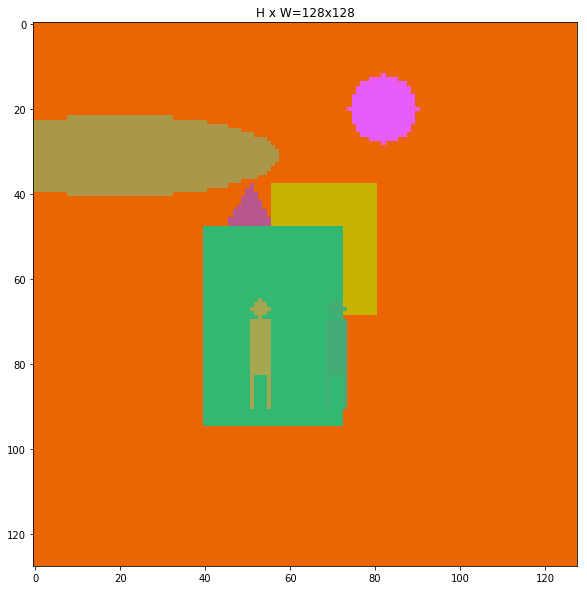

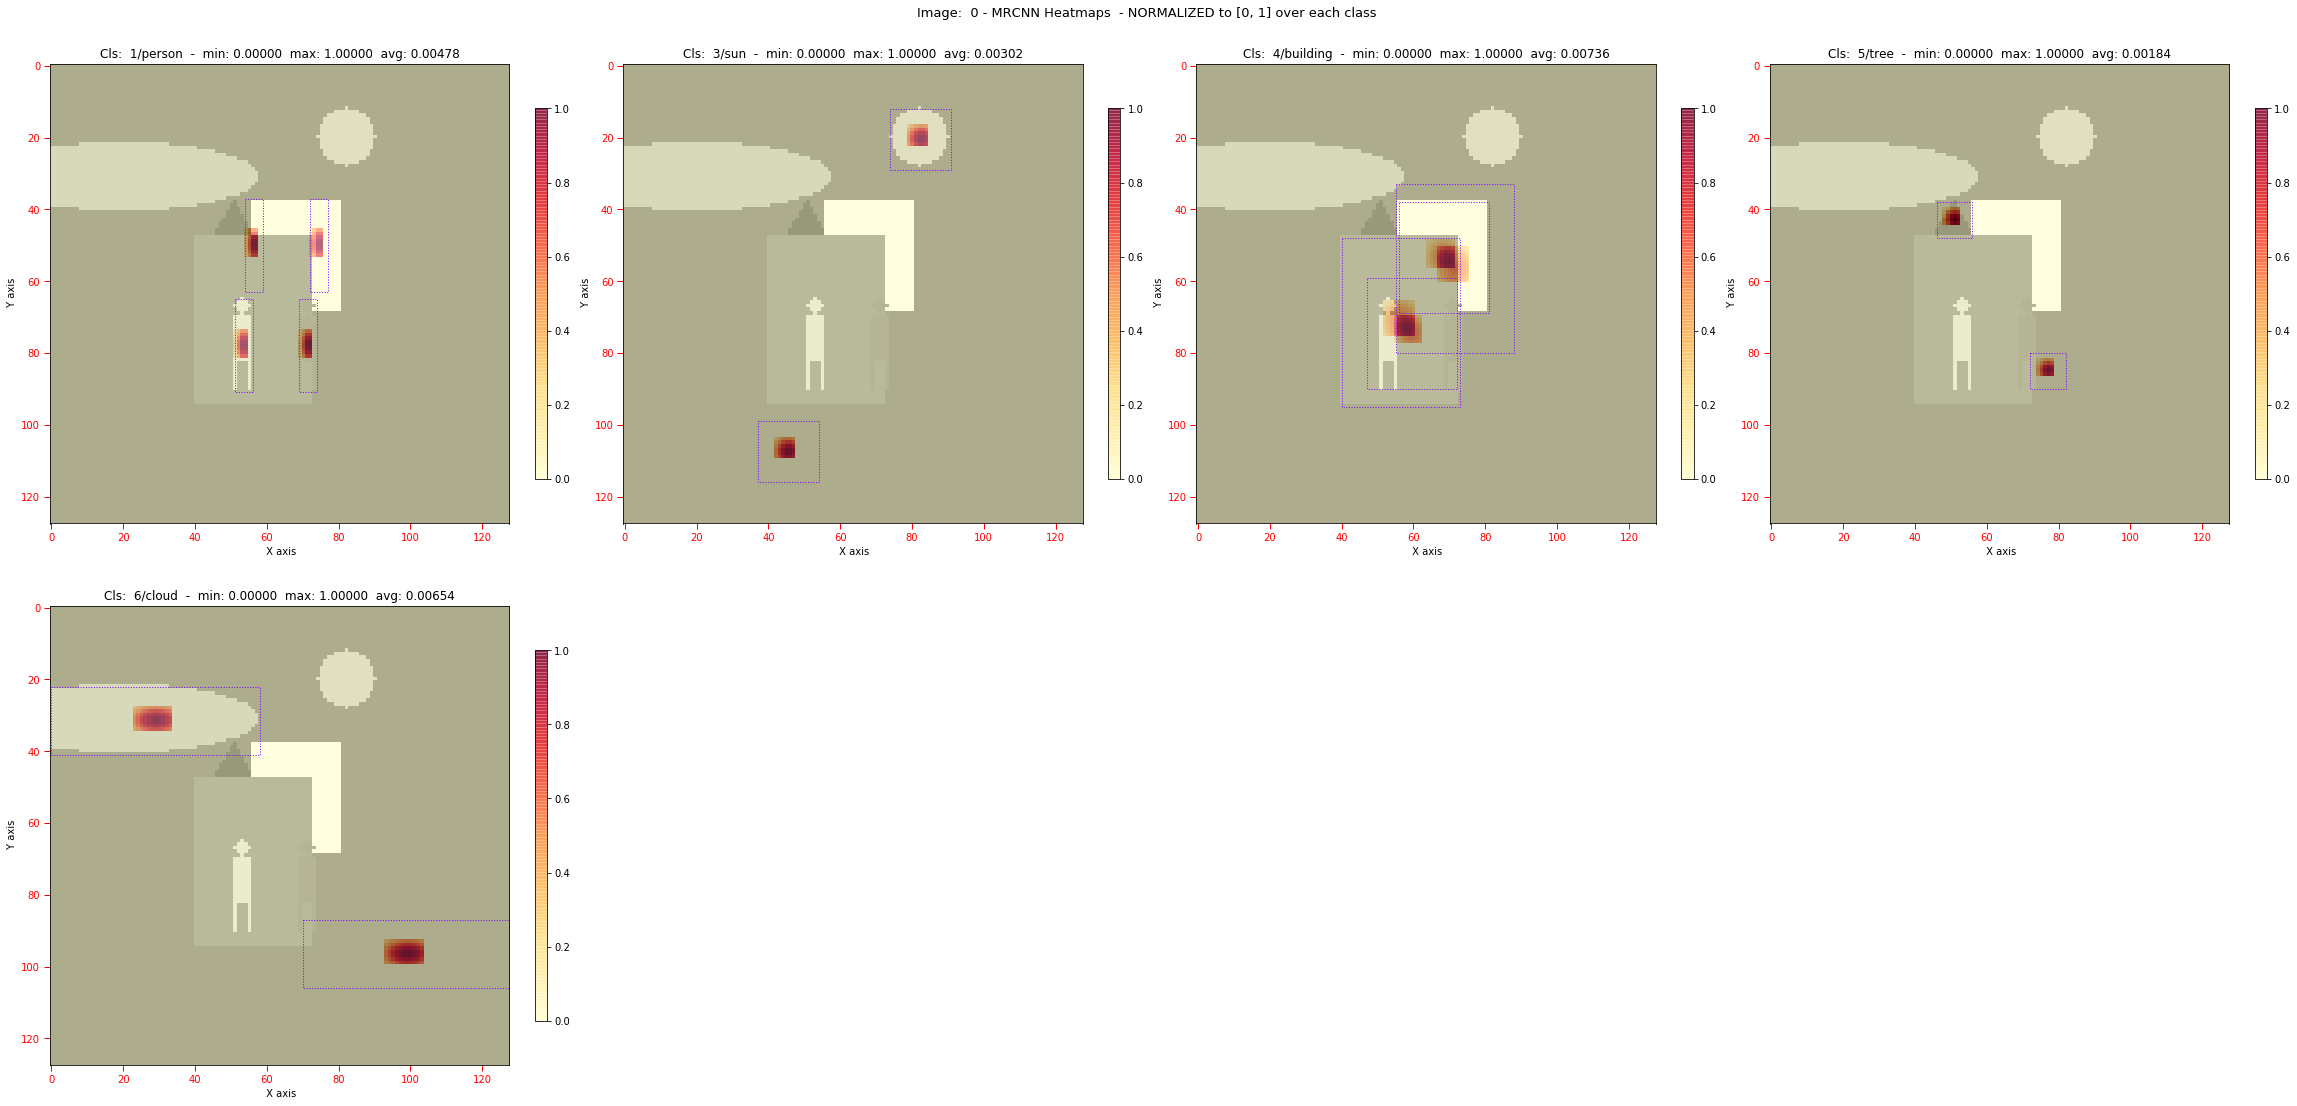

In [33]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class', columns = 4) 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

class ids:  [1, 3, 4, 5, 6]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 7)  Bounding boxes shape:  (7, 100, 24)
Display all classes...


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


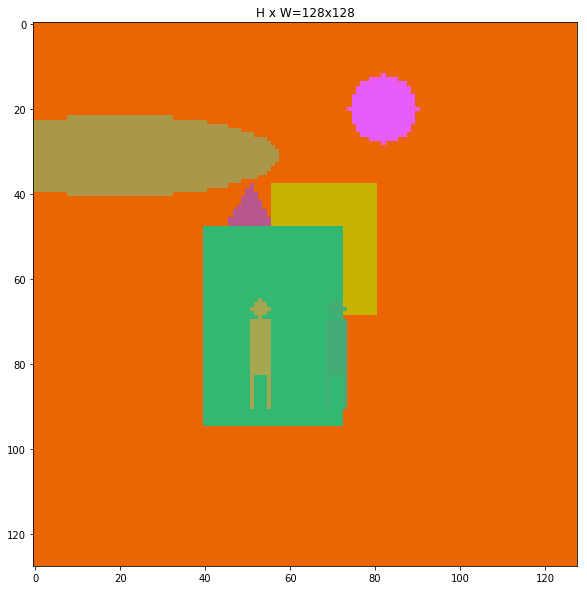

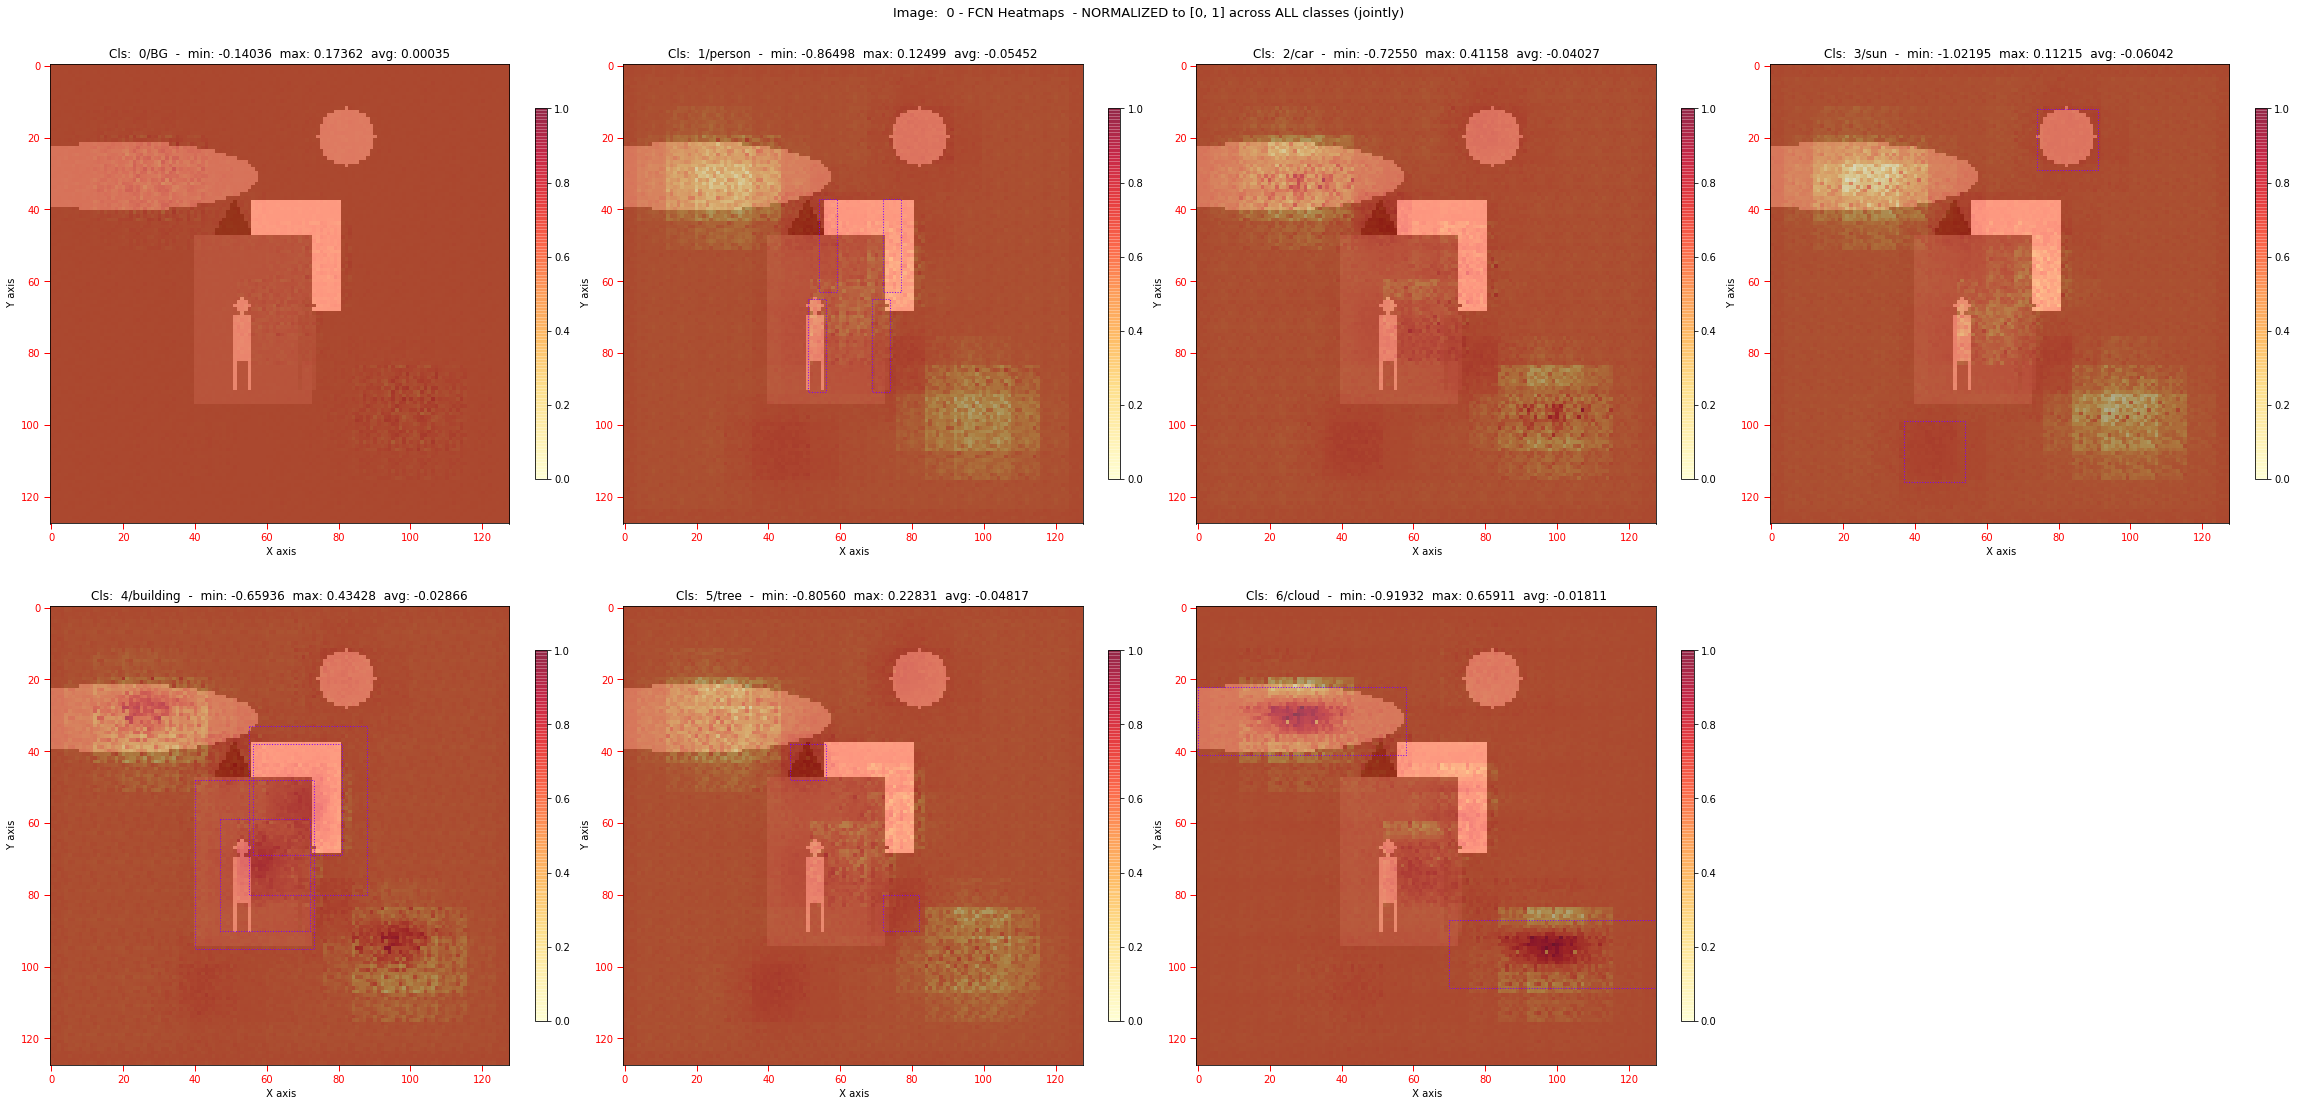

In [36]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, 
#                            class_ids = class_ids, 
                           class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'all', columns = 4) 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

 Scaling options are: 'all', 'class', 'each' , or  'clip' : 
 heatmap shape:  (128, 128, 7)
 Bounding boxes shape:  (7, 100, 24)
Image shape : (128, 128, 3)  class_ids: [         1          3          4          5          6]
 SCALING == clip (clip to [-1, +1])


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


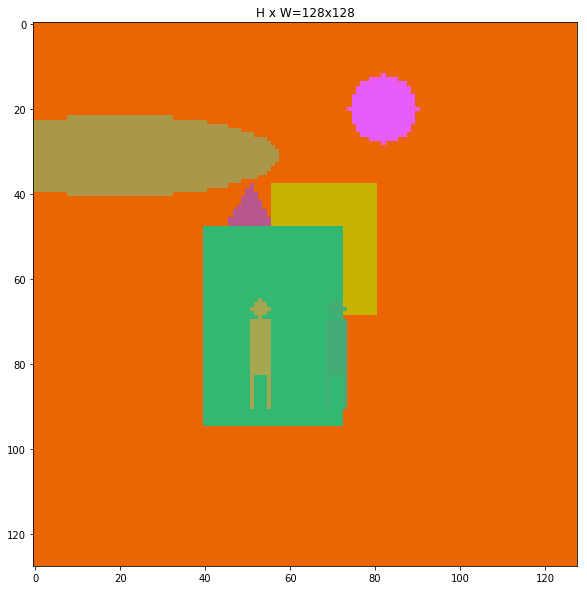

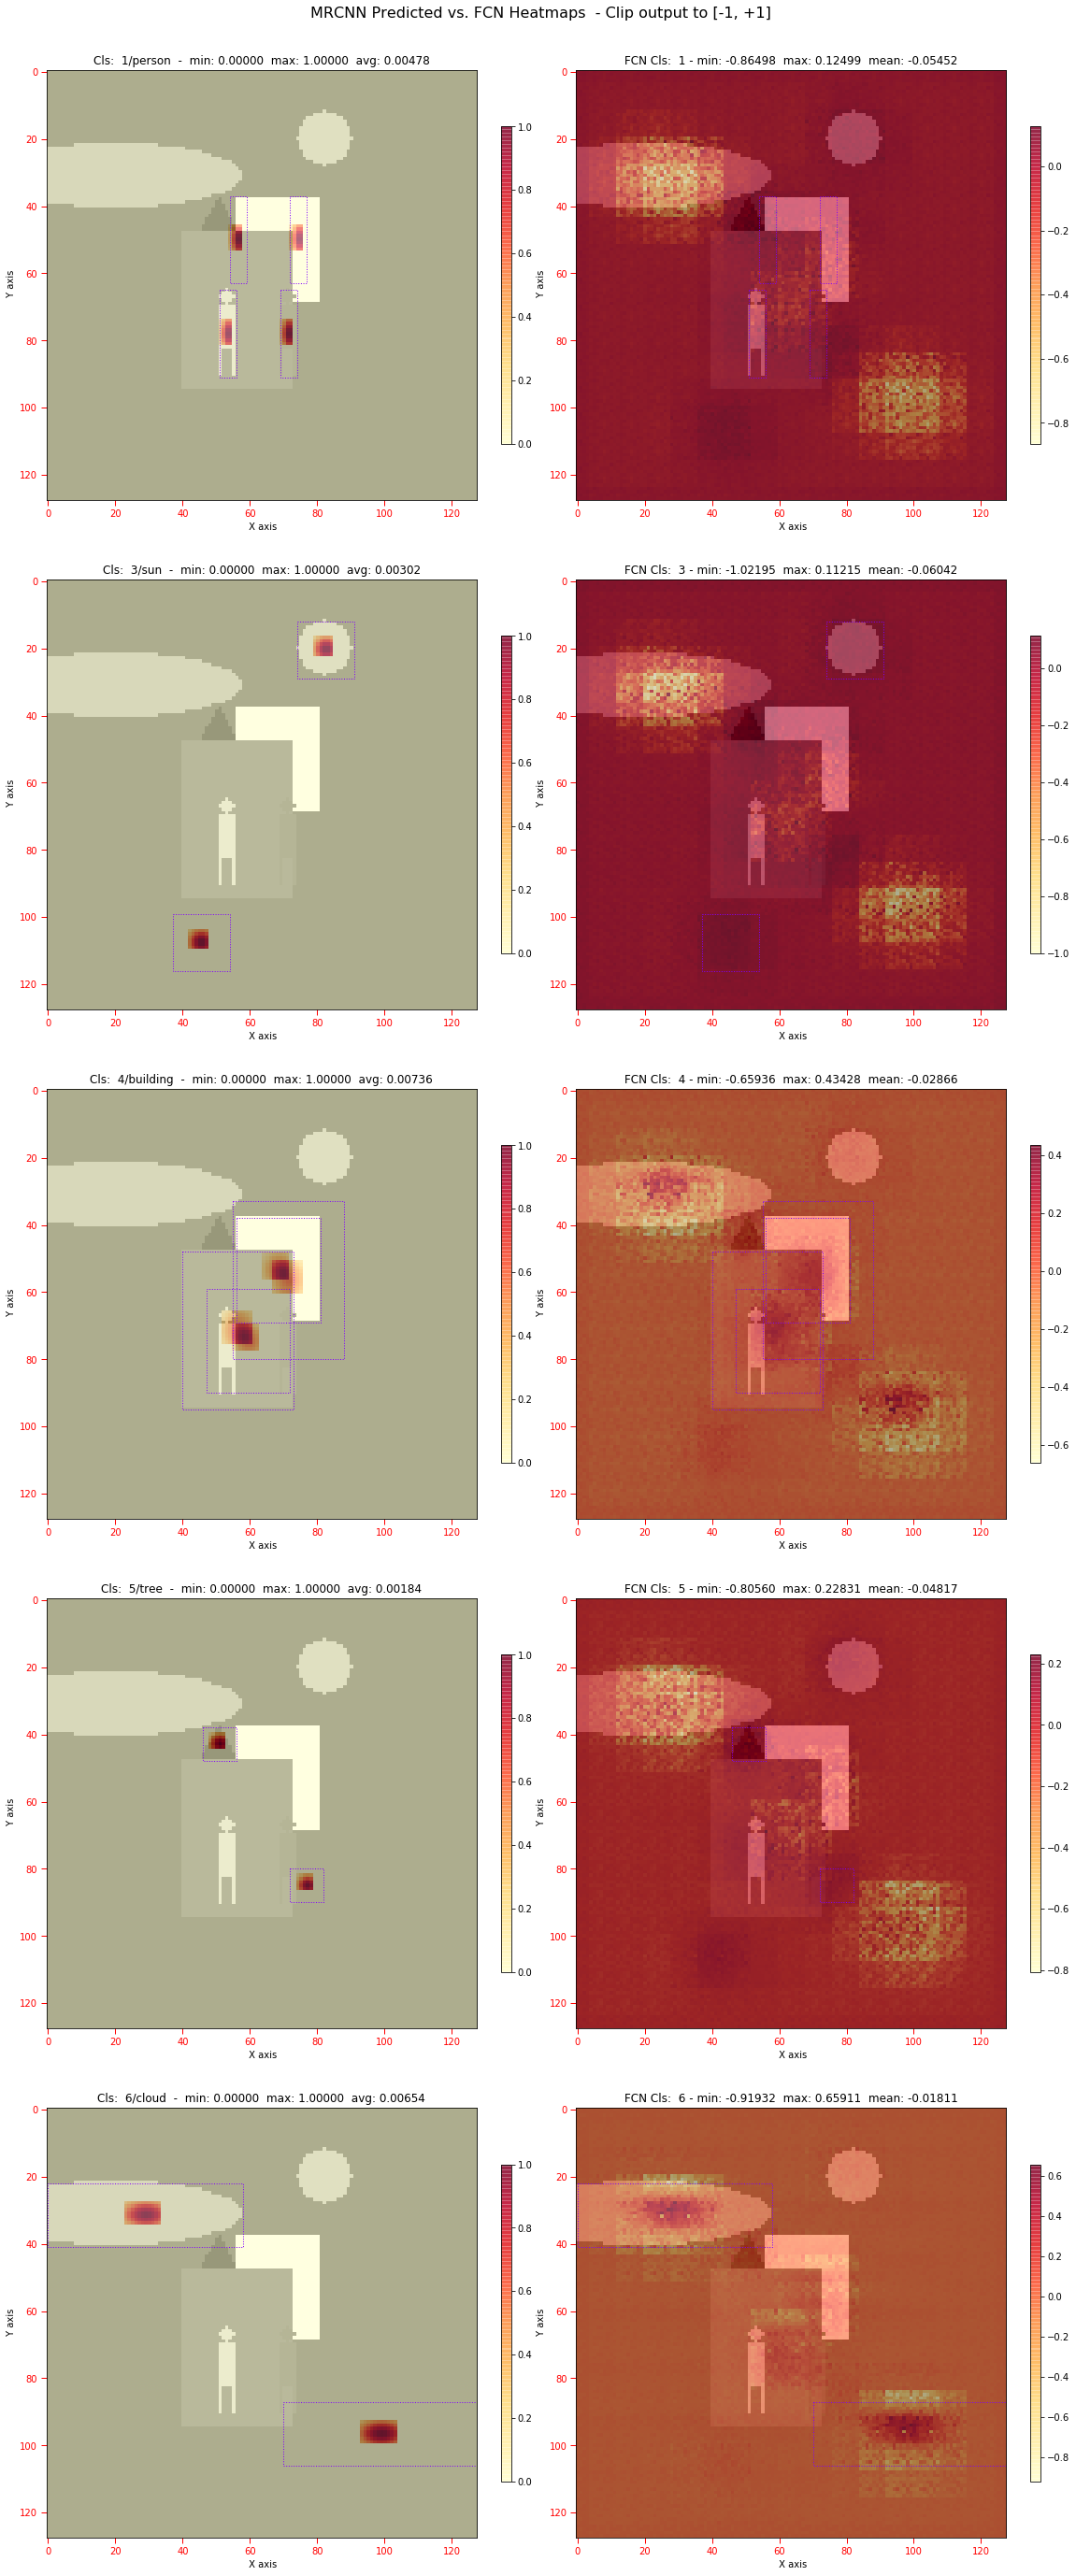

In [38]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, 
#                      class_ids = pr_class_ids, 
                     class_names = coco_class_names, scaling = 'clip')

## 2D Plots

###  2D plot of `model_gt_heatmap`  

In [29]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                 class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

Image : 0  ClassIds: [0, 1, 3, 4, 5, 6]


KeyError: 'gt_hm'

###  2D plot of `pr_heatmap` (w/ Ground Truth Bounding Boxes)

Image : 0  ClassIds: [1, 3, 4, 5, 6]
 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 7)  boxes:  (7, 100, 24)
 Image Id:  0  Display classes: [0, 1, 3, 4, 5, 6]
 rows   3  columns : 2 boxes.shape :  (7, 100, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


<IPython.core.display.Javascript object>


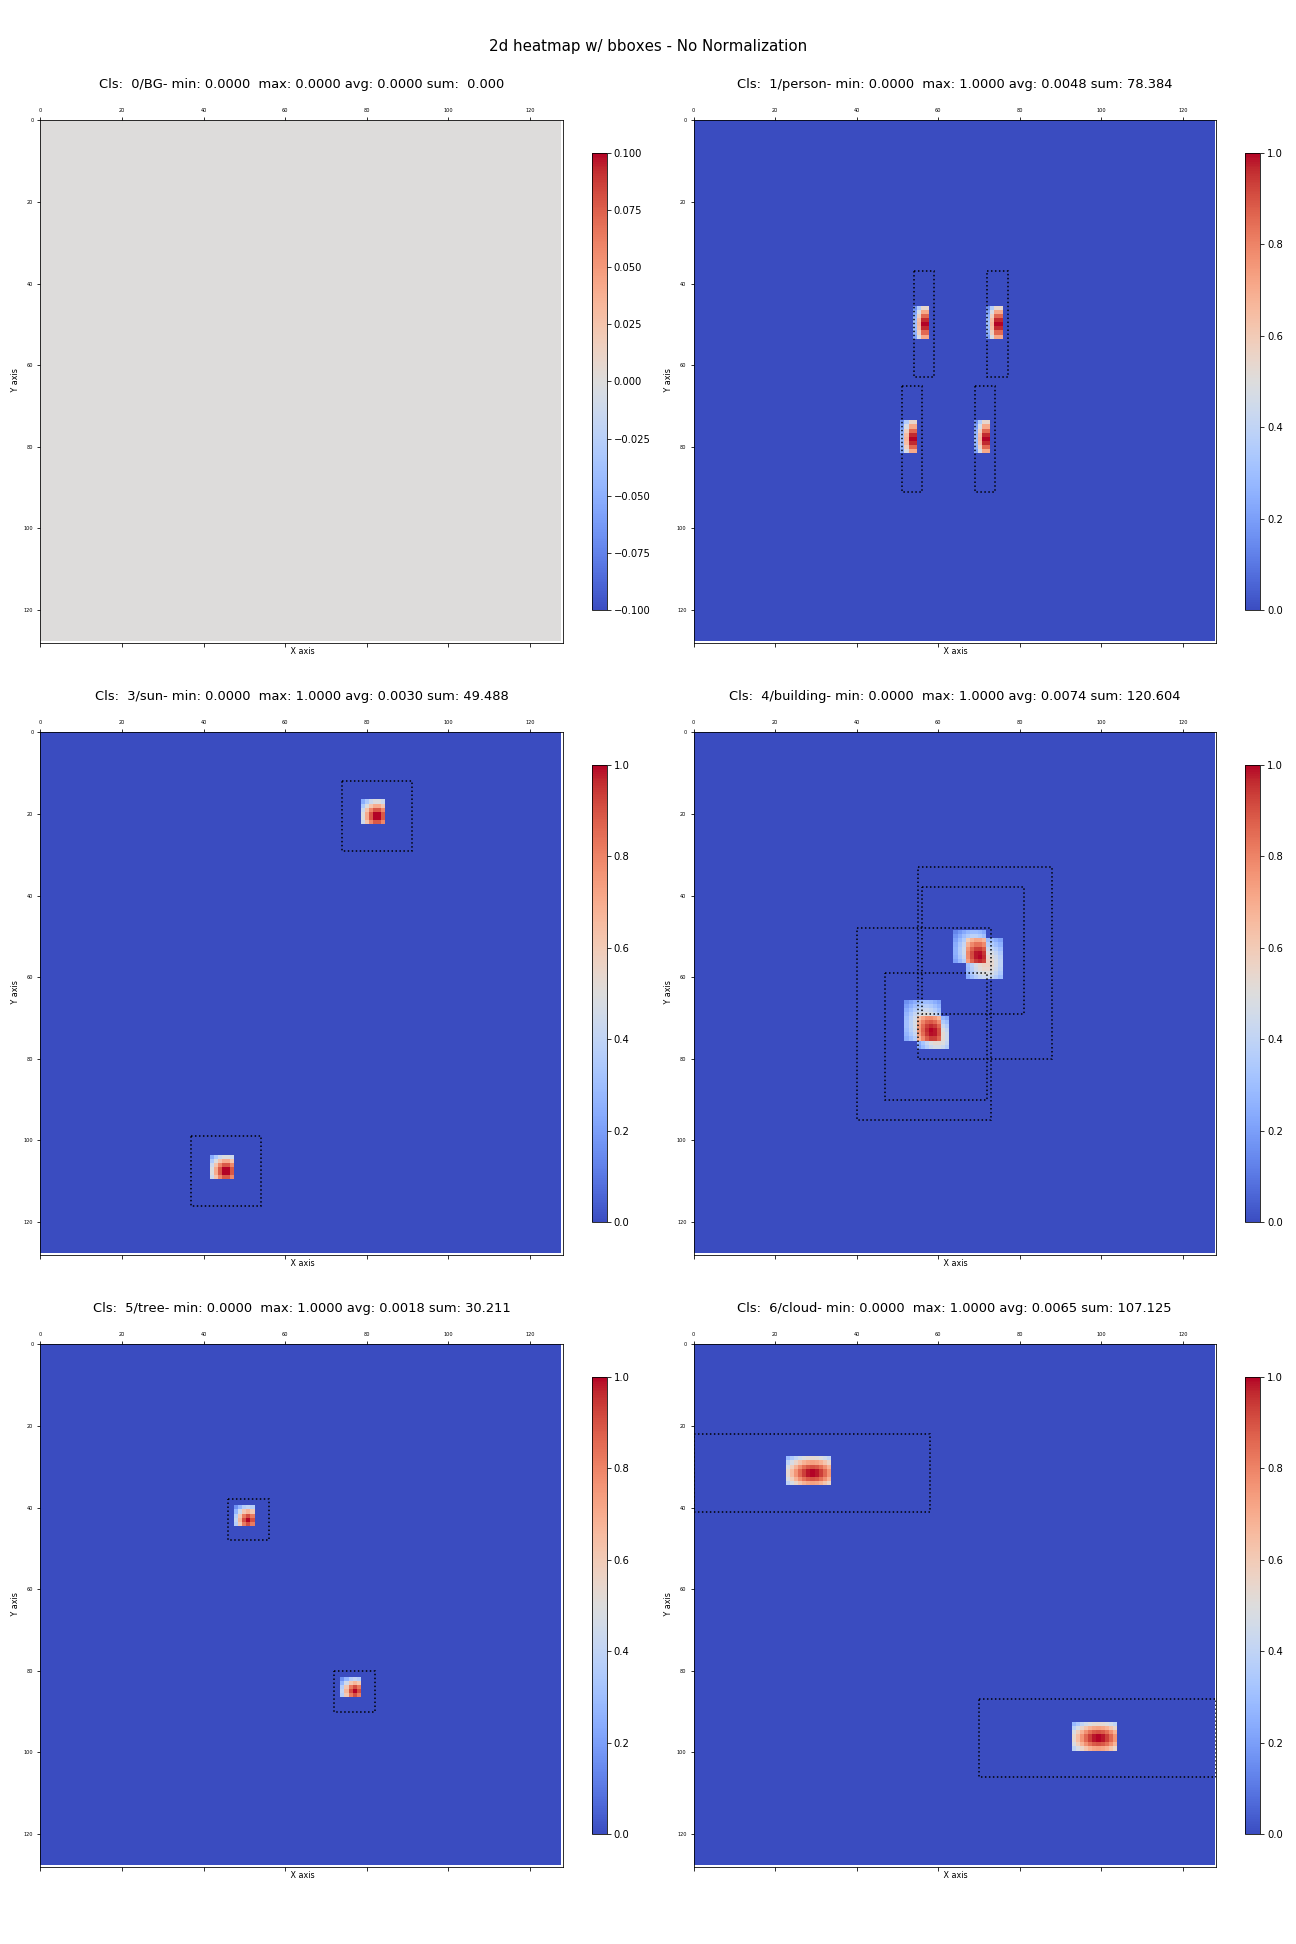

In [30]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
_ = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_hm_scores'],0, gt_class_ids, columns = 2,
                             class_names = coco_class_names, scale = 1, scaling = 'none')

###  2D plot of `fcn_heatmap` (w/ GT Bounding Boxes)

Image : 0  ClassIds: [0, 1, 3, 4, 5, 6]
 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 7)  boxes:  (7, 100, 24)
 Image Id:  0  Display all classes...
 rows   4  columns : 2 boxes.shape :  (7, 100, 24)
 min_z_all shape: ()  min_z_all: -1.0219479  max_z_all: () max_z_all: 0.6591067
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


<IPython.core.display.Javascript object>


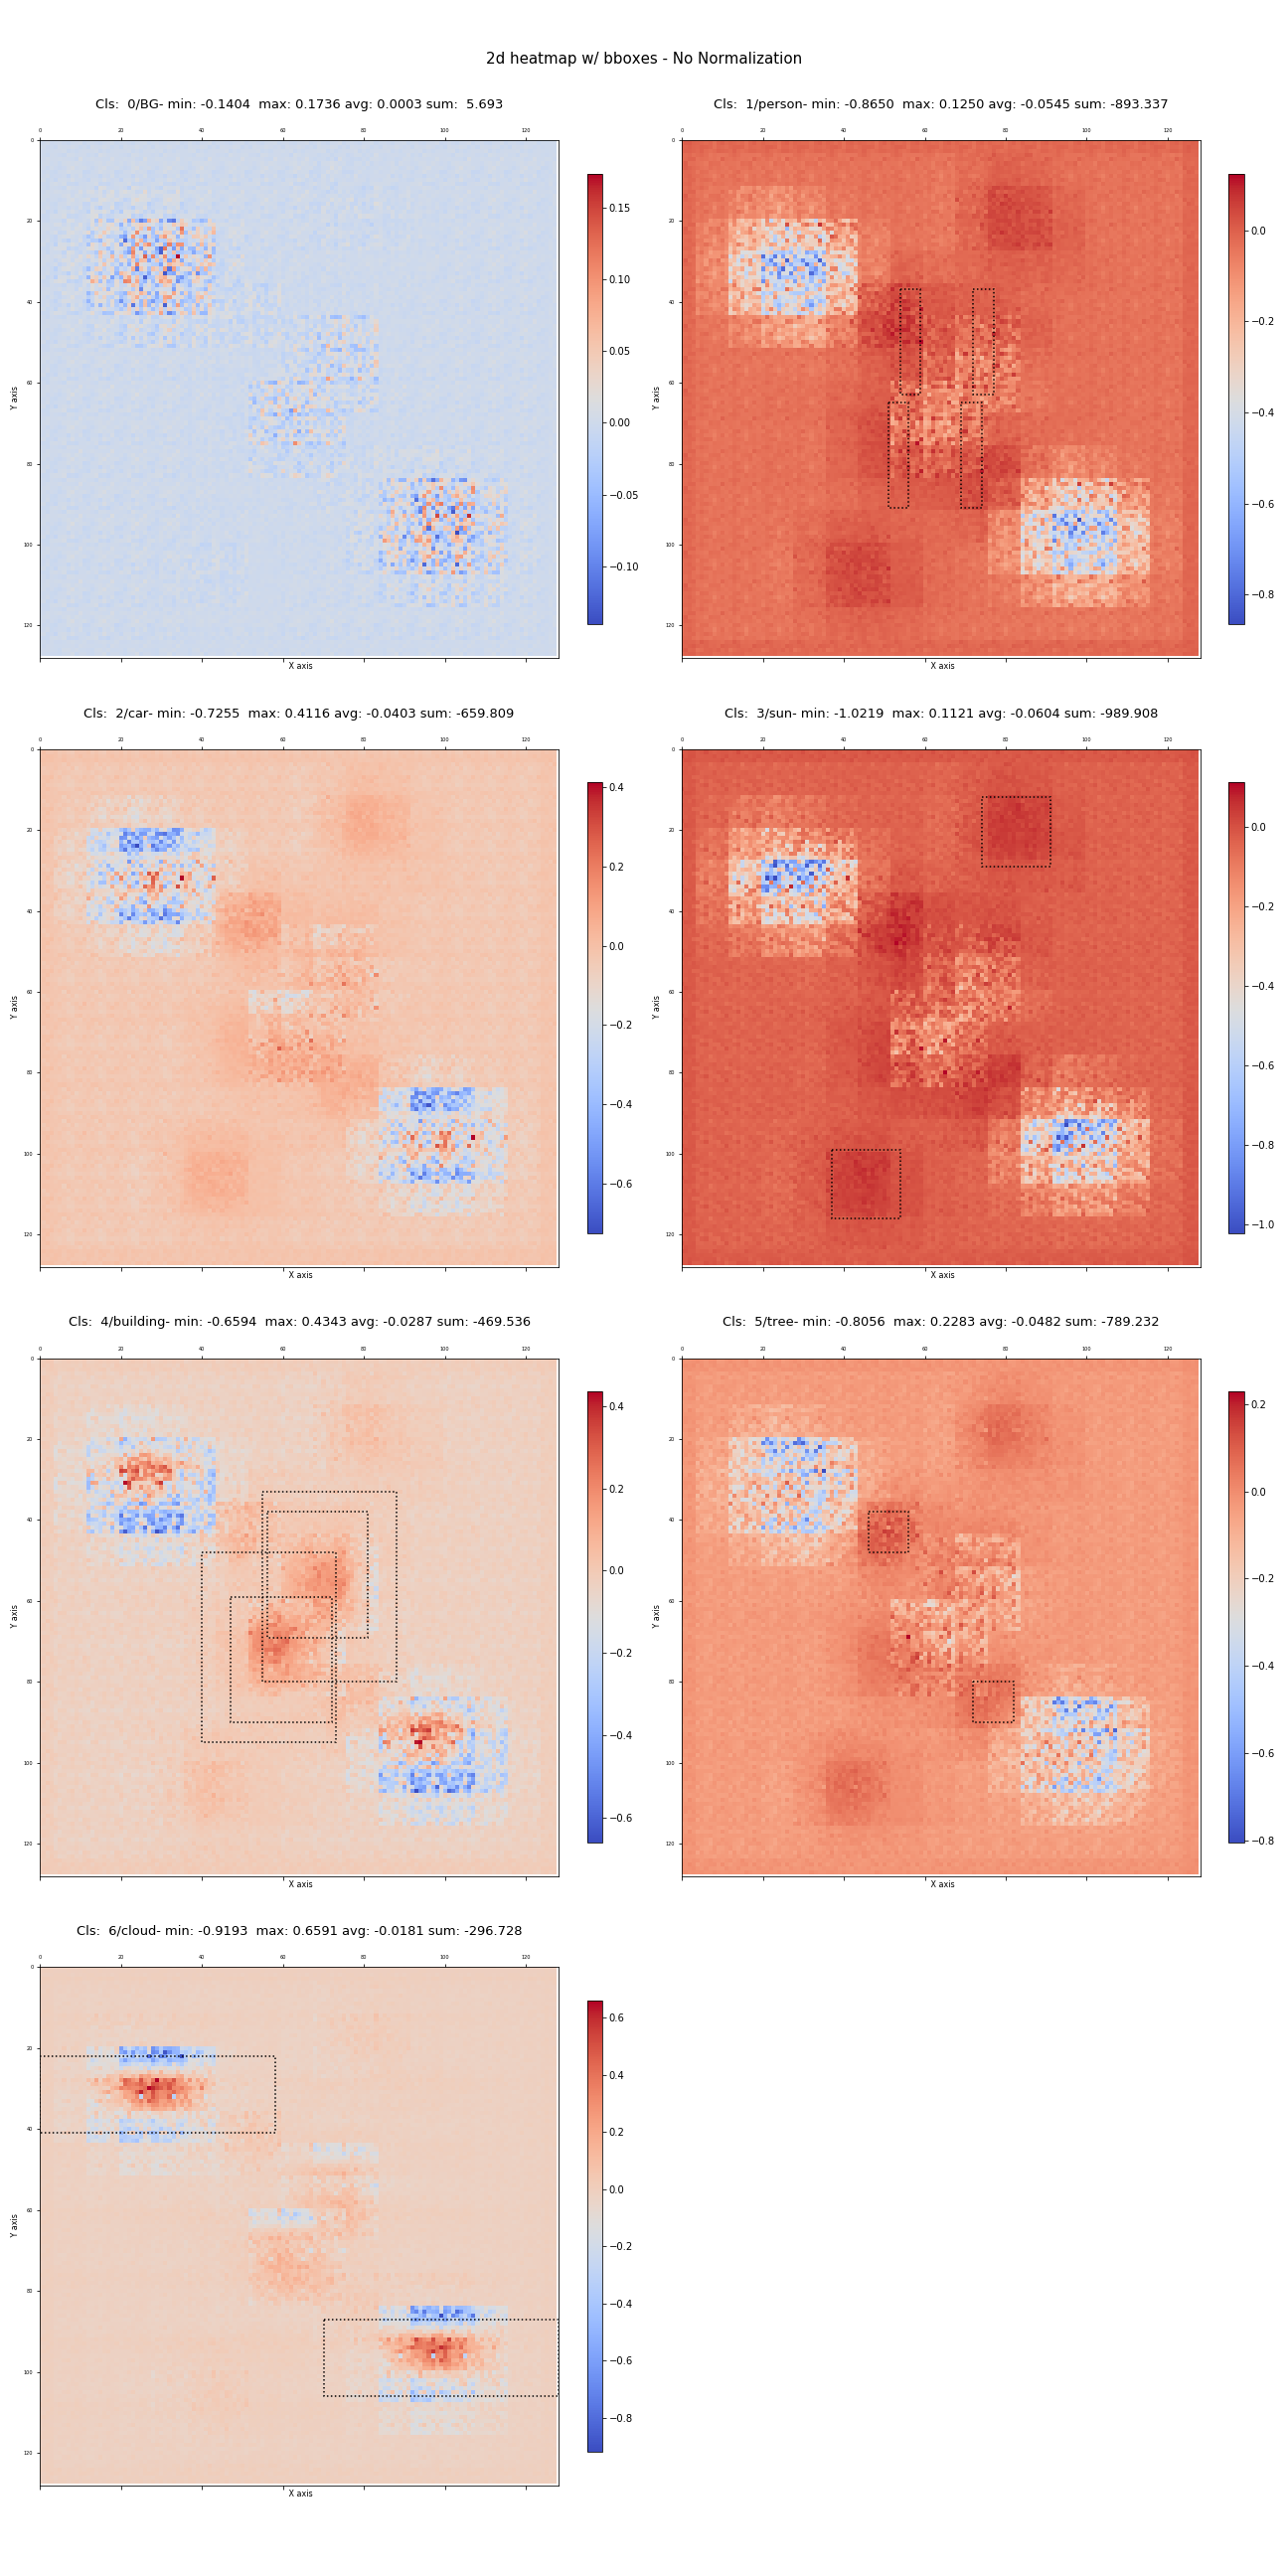

In [31]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
disp_classes = None 

_ = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_hm_scores'],img_id, disp_classes, columns = 2, size=(9,9),
                             class_names = coco_class_names, scale = 1, scaling = 'none')

###  2D plot of `model_fcn_heatmap` (w/ MRCNN PREDICTED Bounding Boxes)

(128, 128, 7)
Image : 0  ClassIds: [1, 3, 4, 5, 6]
 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 7)  boxes:  (7, 100, 24)
 Image Id:  0  Display classes: [1, 3, 4, 5, 6]
 rows   3  columns : 2 boxes.shape :  (7, 100, 24)
 min_z_all shape: ()  min_z_all: -1.0219479  max_z_all: () max_z_all: 0.6591067
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == class


<IPython.core.display.Javascript object>


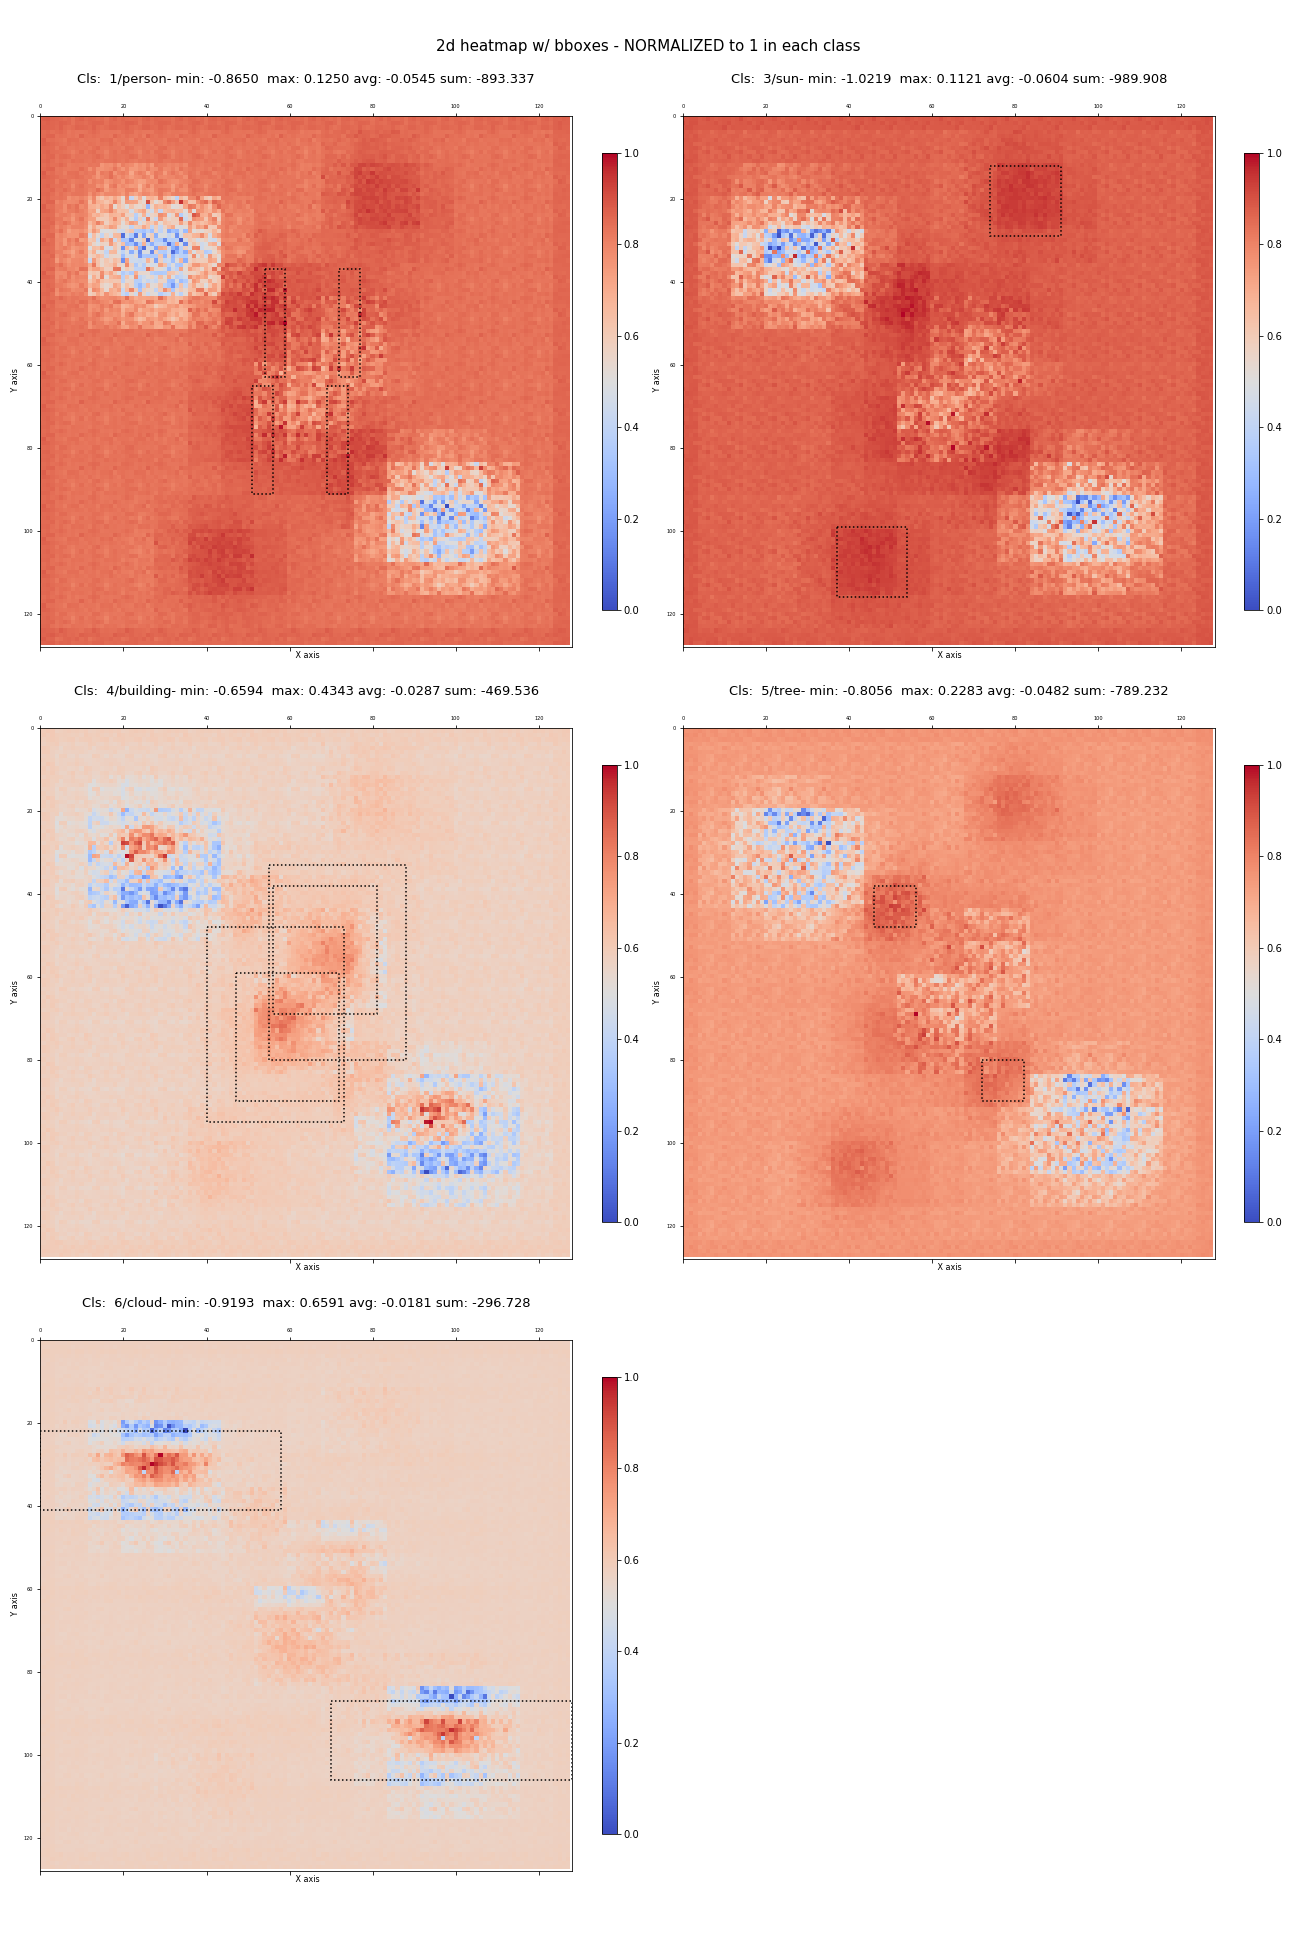

In [32]:
print(f['fcn_hm'].shape)
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
fig  = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_hm_scores'],img_id, pr_class_ids, columns = 2,
                             class_names = coco_class_names, scale = 1, scaling = 'class')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
# class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
# print('Image : {}  Pred ClassIds: {}'.format(img_id, class_ids))
# fig  = visualize.plot_2d_heatmap(model_fcn_heatmap, model_fcn_scores, img_id, 
#                                  columns = 5, class_names = coco_class_names, scale = 4, scaling = 'class')    
#     fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

(7, 100, 24)
Image : 0  ClassIds: [0, 1, 3, 4, 5, 6]
 Scaling options are 'all', 'class', 'each' or 'None' 
Display classes: [0, 1, 3, 4, 5, 6]
 min_z1_all shape: ()  min_z1_all: 0.0  max_z1_all: () max_z1_all: 1.0
 min_z2_all shape: ()  min_z2_all: -1.0219479  max_z2_all: () max_z2_all: 0.6591067


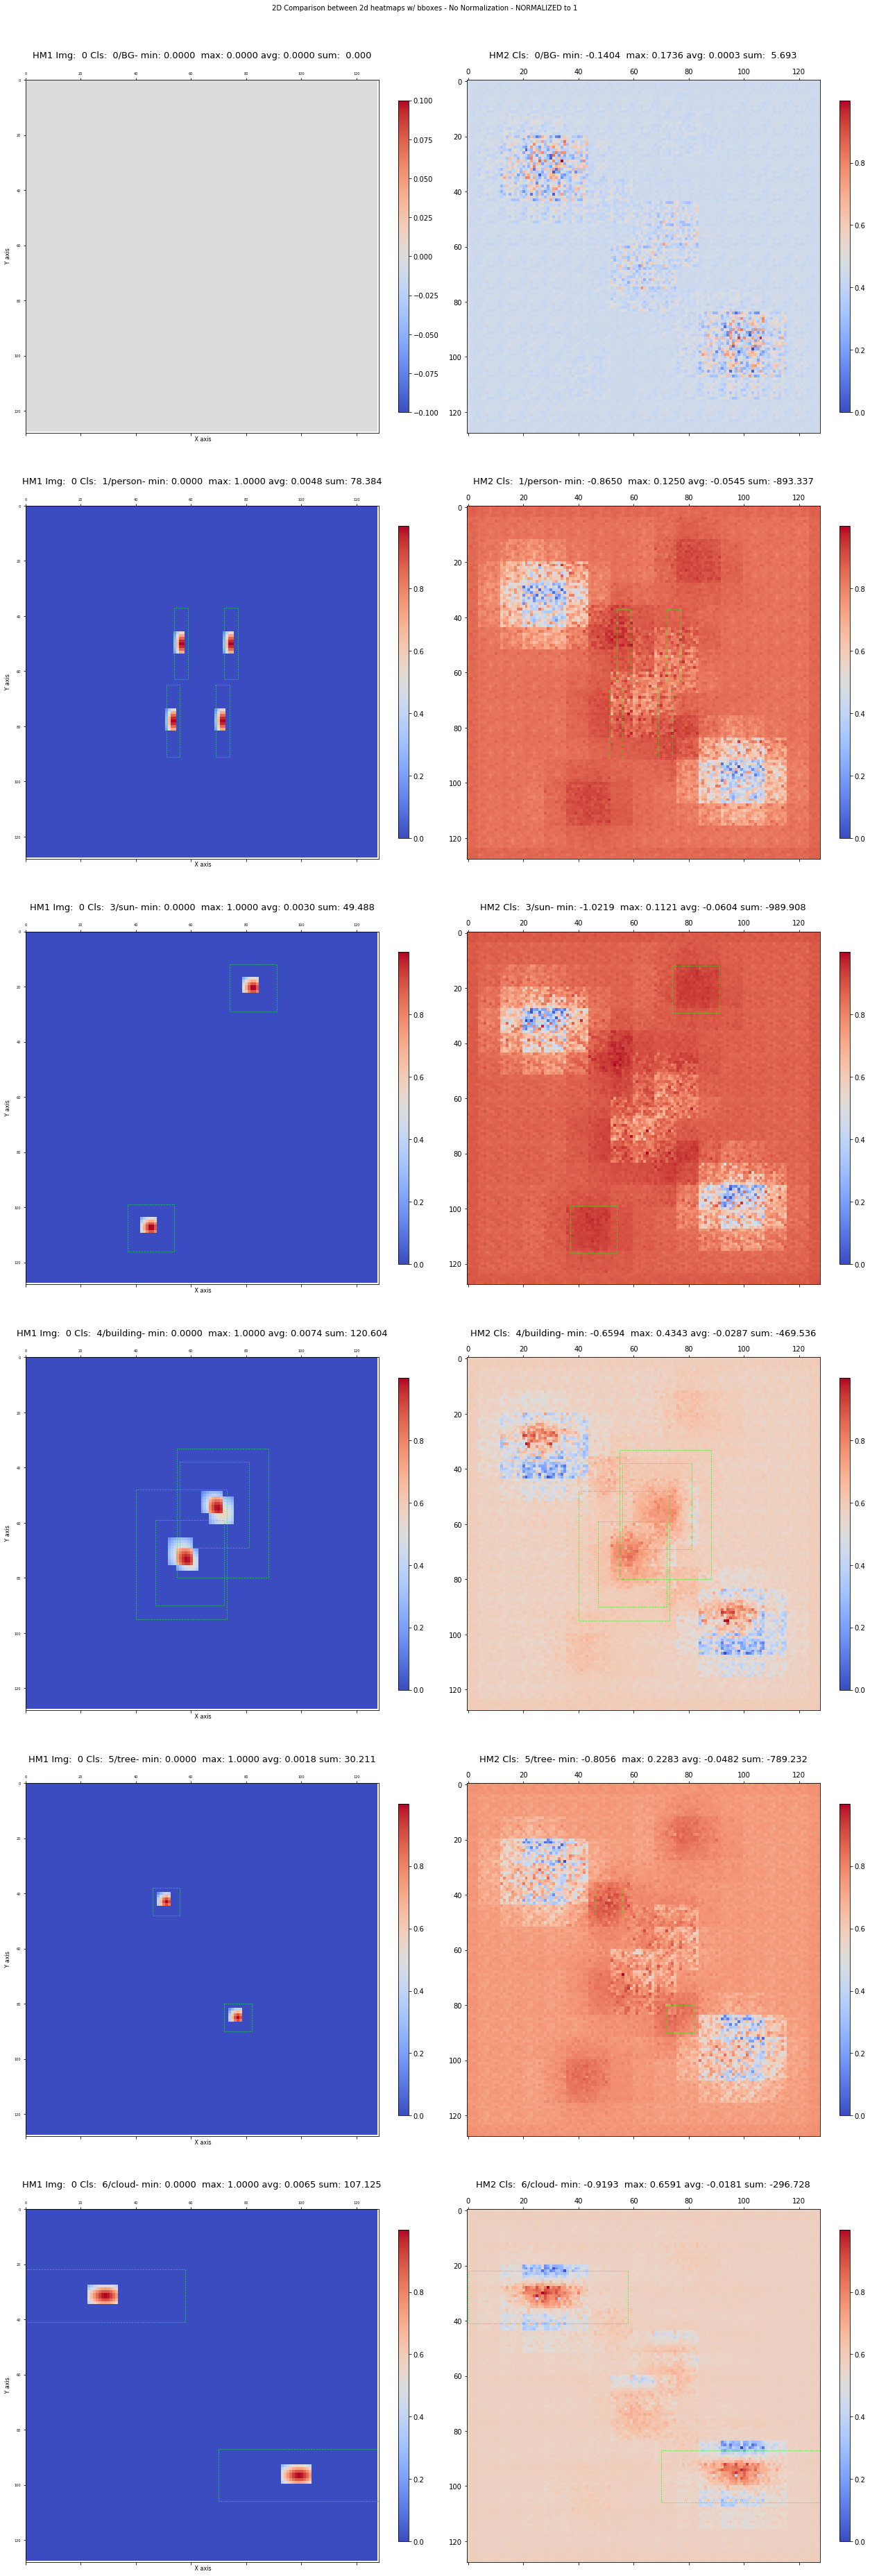

In [79]:
print(f['pr_hm_scores'].shape)
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(f['pr_hm_scores'][:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
#     class_ids = list(range(30))
    _ = visualize.plot_2d_heatmap_compare(f['pr_hm'], f['fcn_hm'], f['pr_hm_scores'],  
                            img_id, class_ids = class_ids, class_names = class_names, scale = 1, scaling = 'none' )    

##  3D Plots

###  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

0.6591067 -1.0219479
(128, 128, 7)
Image : 0  ClassIds: None


<IPython.core.display.Javascript object>


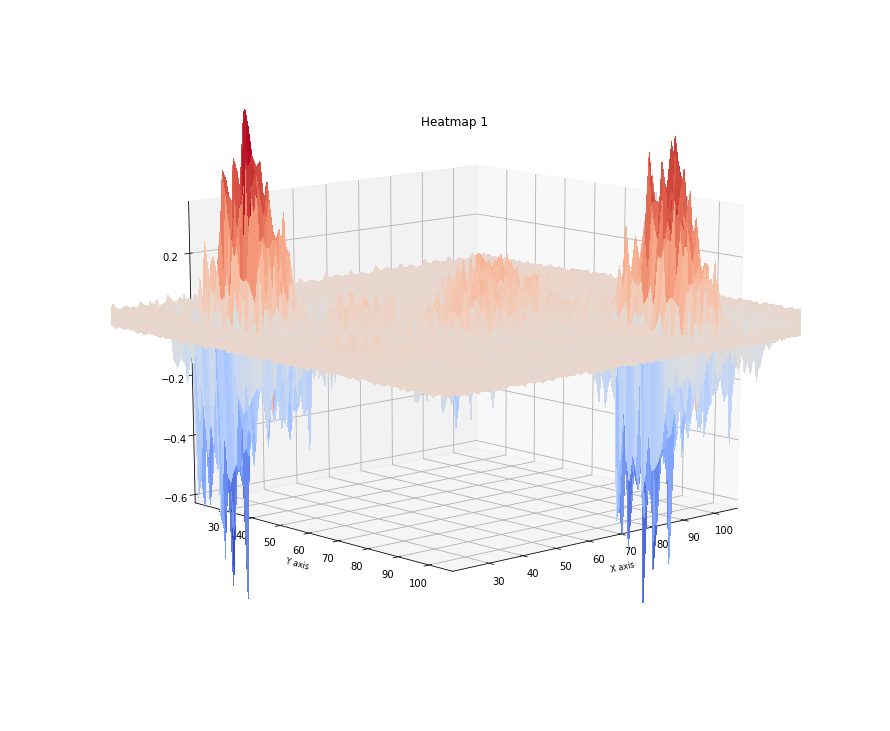

In [33]:
# import matplotlib.pyplot as plt
# from   mpl_toolkits.mplot3d import Axes3D

# from importlib import reload
# reload(plt)
# %matplotlib notebook
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))
print(f['fcn_hm'].shape)
class_ids = pr_class_ids
class_ids = None 
# class_ids = np.arange(10)
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
# visualize.plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = class_names, scaling = 'none', size = (24,24), columns = 1)
visualize.plot_3d_gaussian(f['fcn_hm'][:,:,6])

###  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

(128, 128, 7)
Image : 0  ClassIds: [1, 3, 4, 5, 6]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display all classes...
rows   4  columns : 2
3
 min_z_all shape: ()  min_z_all: -1.0219479  max_z_all: () max_z_all: 0.6591067
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


<IPython.core.display.Javascript object>


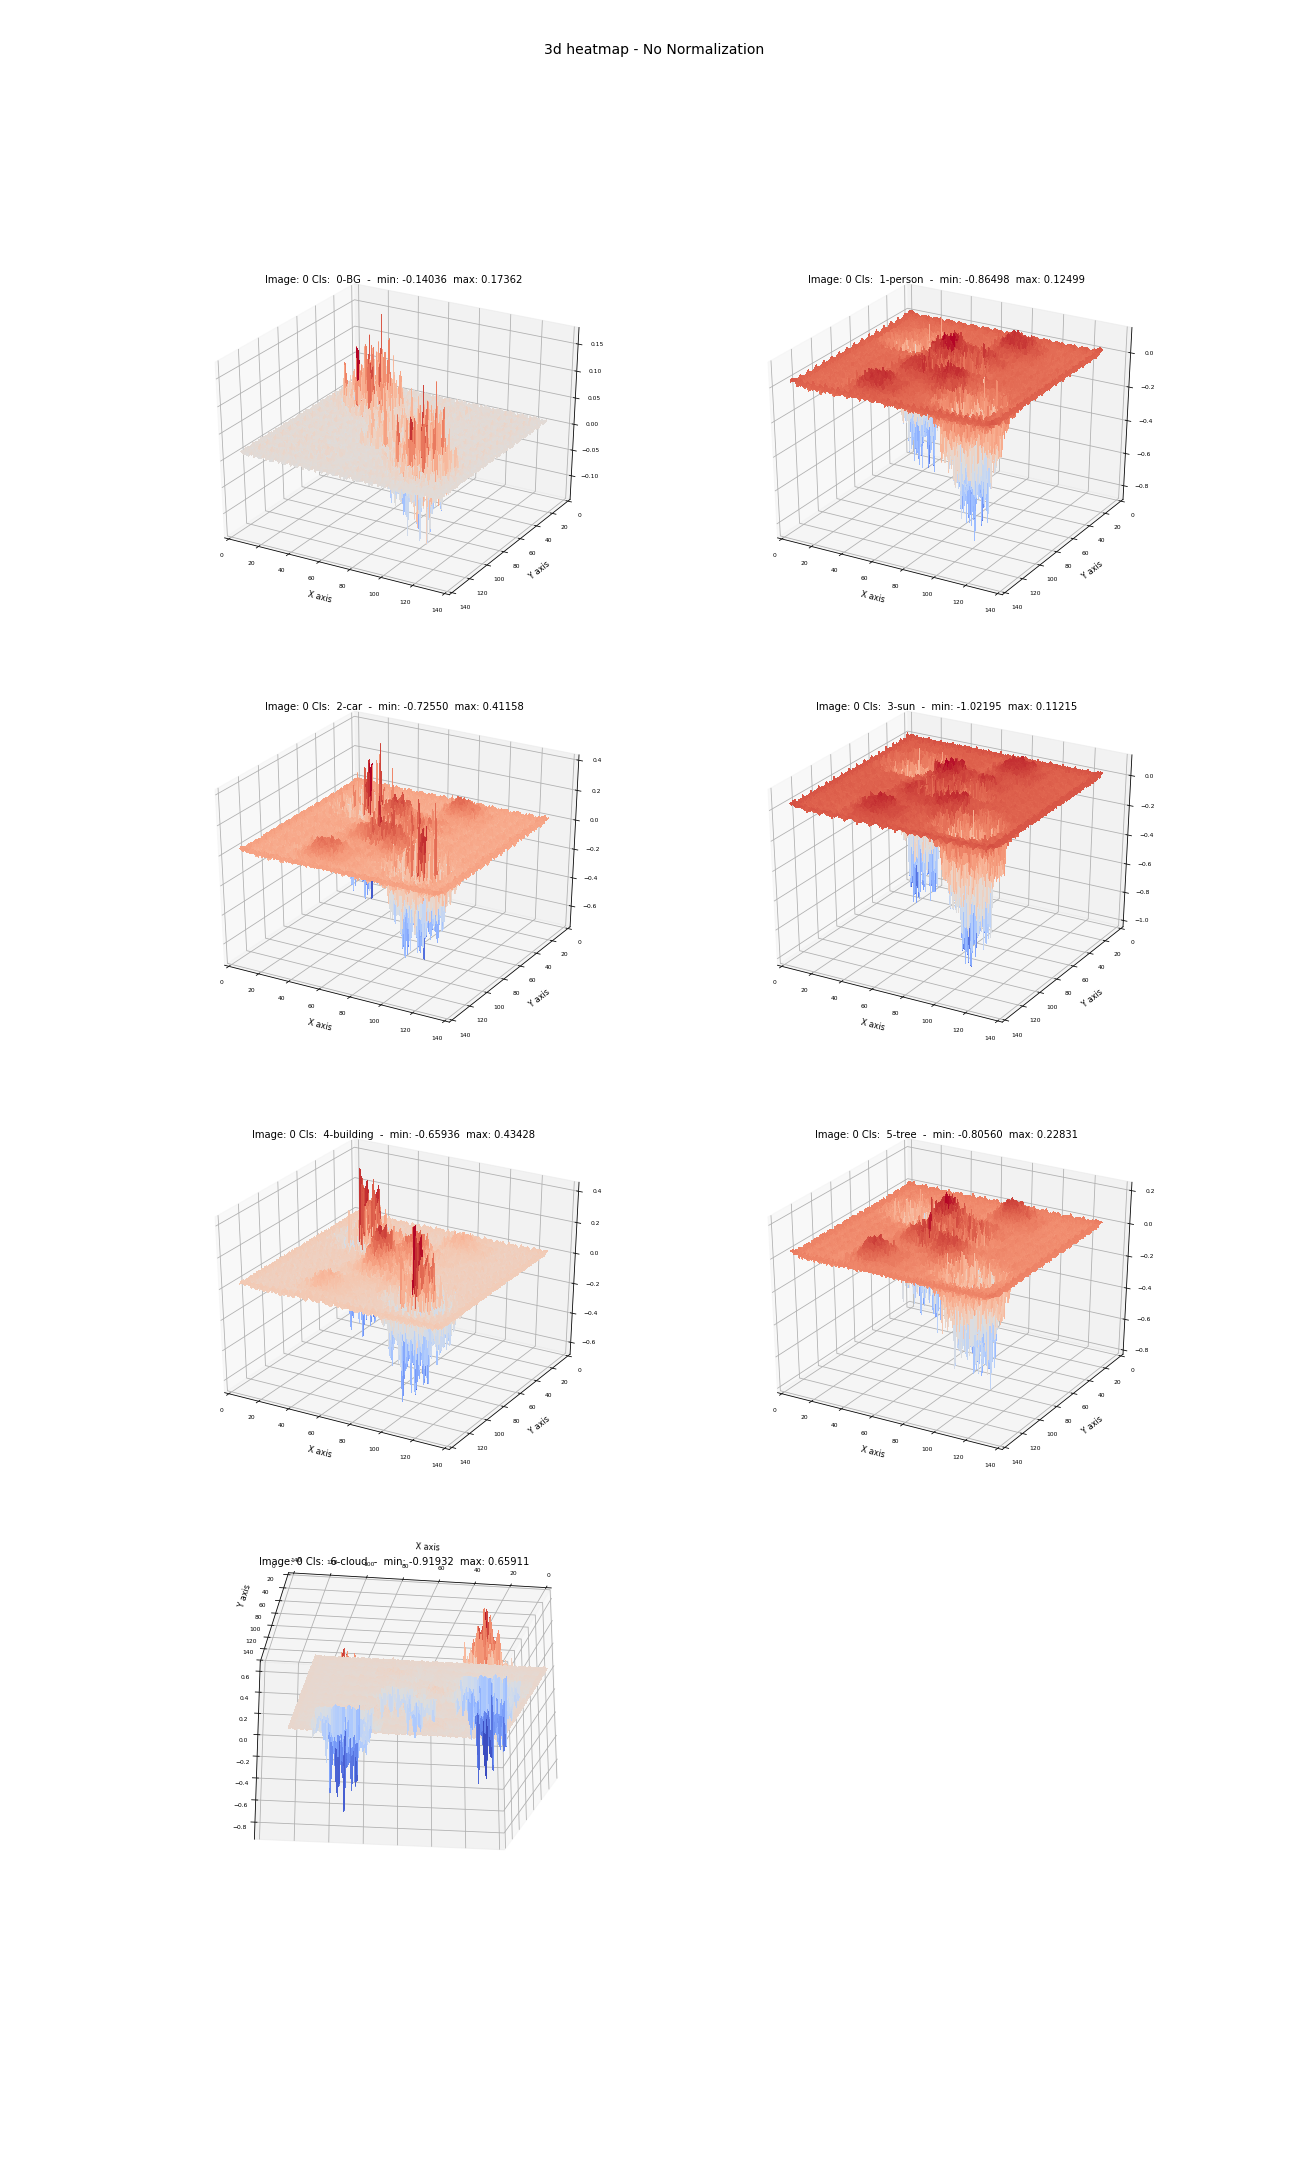

1 zlim = each  zlim_min : -0.14036100 zlim_max: 0.17361738 
1 zlim = each  zlim_min : -0.86498469 zlim_max: 0.12498938 
1 zlim = each  zlim_min : -0.72549516 zlim_max: 0.41158333 
1 zlim = each  zlim_min : -1.02194786 zlim_max: 0.11214944 
1 zlim = each  zlim_min : -0.65935677 zlim_max: 0.43428320 
1 zlim = each  zlim_min : -0.80560422 zlim_max: 0.22830895 
1 zlim = each  zlim_min : -0.91931903 zlim_max: 0.65910667 


In [27]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(f['fcn_hm'].shape)
    class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    visualize.plot_3d_heatmap(f['fcn_sm'], 0,class_names = coco_class_names, scaling = 'none')

# Run Object Detection on sample images

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import random
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = 'E:/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
# results = mrcnn_model.detect([image], verbose=1)
results = fcn_model.detect_from_images(mrcnn_model, [image], verbose=1)

###  Test on loaded image

In [ ]:
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox, cls, dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores']) #, score_range=(0.21, 0.22))

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Evaluation of mAP  over a number of images

##  Modified Version for MRCNN - FCN 

In [21]:
class_dict = []
gt_dict = {}
pr_dict = {}
 
for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
    class_dict.append({'id'   : int(a),
                         'name' : b,
                         'scores': [],
                         'bboxes': [],
                         'mrcnn_score_orig' : [],
                         'mrcnn_score_norm' : [], 
                         'mrcnn_score_0' : [],
                         'mrcnn_score_1' : [],
                         'mrcnn_score_2' : [],
                         'fcn_score_0' : [],
                         'fcn_score_1' : [],
                         'fcn_score_2' : [],                      
                      })
            

In [37]:

# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

shuffled_image_ids = np.copy(dataset_test.image_ids)
# np.random.shuffle(shuffled_image_ids)
image_ids = shuffled_image_ids[:500]
MRCNN_AP_Orig = []
MRCNN_AP_0 = [] 
MRCNN_AP_1 = [] 
MRCNN_AP_2 = []
FCN_AP_0   = []
FCN_AP_1   = []
FCN_AP_2   = []
# image_ids = np.random.choice(dataset_test.image_ids, 300)



In [33]:
# print(image_ids)

In [34]:
for image_id in image_ids:
    # Load image and ground truth data
    print('==> Calculate AP for image_id : ', image_id)
    # Run object detection
    eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_id, display = False)    
    fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =0)    
    
#     for i,j in zip(r['class_ids'], r['scores']):
#         print(' --- ', i, ' - ', j)
#     print('r[class_ids]', r['class_ids'])
#     print('r[class_scores]', r['scores'])
    gt_dict, pr_dict, class_dict = update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)
    
    r = fcn_results[0] 
#     AP, precisions, recalls, overlaps
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,orig_score])
#     print('   MRCNN_AP_Orig:', AP)
    MRCNN_AP_Orig.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_0])
#     print('   MRCNN_AP_0   :', AP)
    MRCNN_AP_0.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'],  r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_0])
#     print('   FCN_AP_0   :', AP)
    FCN_AP_0.append(AP)

    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'],  r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_1])
#     print('   MRCNN_AP_1   :', AP)
    MRCNN_AP_1.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'],  r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_1])
#     print('   FCN_AP_1   :', AP)
    FCN_AP_1.append(AP)
    

    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'],  r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_2])
#     print('   MRCNN_AP_2   :', AP)
    MRCNN_AP_2.append(AP)
    
    AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'],  r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_2])
#     print('   FCN_AP_2   :', AP)
    FCN_AP_2.append(AP)
    
# print("mAP: ", np.mean(APs))

==> Calculate AP for image_id :  0
 Max Overlap:  0
==> Calculate AP for image_id :  1
 Max Overlap:  0
==> Calculate AP for image_id :  2
 Max Overlap:  0.037330844
==> Calculate AP for image_id :  3
 Max Overlap:  0
==> Calculate AP for image_id :  4
 Max Overlap:  0
==> Calculate AP for image_id :  5
 Max Overlap:  0.4249668
==> Calculate AP for image_id :  6
 Max Overlap:  0
==> Calculate AP for image_id :  7
 Max Overlap:  0
==> Calculate AP for image_id :  8
 Max Overlap:  0
==> Calculate AP for image_id :  9
 Max Overlap:  0.026666667
==> Calculate AP for image_id :  10
 Max Overlap:  0
==> Calculate AP for image_id :  11
 Max Overlap:  0.10526316
==> Calculate AP for image_id :  12
 Max Overlap:  0
==> Calculate AP for image_id :  13
 Max Overlap:  0
==> Calculate AP for image_id :  14
 Max Overlap:  0.09351928
==> Calculate AP for image_id :  15
 Max Overlap:  0.21333334
==> Calculate AP for image_id :  16
 Max Overlap:  0
==> Calculate AP for image_id :  17
 Max Overlap:  0
=

 Max Overlap:  0
==> Calculate AP for image_id :  146
 Max Overlap:  0
==> Calculate AP for image_id :  147
 Max Overlap:  0
==> Calculate AP for image_id :  148
 Max Overlap:  0
==> Calculate AP for image_id :  149
 Max Overlap:  0
==> Calculate AP for image_id :  150
 Max Overlap:  0
==> Calculate AP for image_id :  151
 Max Overlap:  0.020408163
==> Calculate AP for image_id :  152
 Max Overlap:  0
==> Calculate AP for image_id :  153
 Max Overlap:  0.094151214
==> Calculate AP for image_id :  154
 Max Overlap:  0.42372882
==> Calculate AP for image_id :  155
 Max Overlap:  0
==> Calculate AP for image_id :  156
 Max Overlap:  0
==> Calculate AP for image_id :  157
 Max Overlap:  0.2820513
==> Calculate AP for image_id :  158
 Max Overlap:  0.08998393
==> Calculate AP for image_id :  159
 Max Overlap:  0
==> Calculate AP for image_id :  160
 Max Overlap:  0.3243243
==> Calculate AP for image_id :  161
 Max Overlap:  0.108597286
==> Calculate AP for image_id :  162
 Max Overlap:  0.0

 Max Overlap:  0.21674877
==> Calculate AP for image_id :  289
 Max Overlap:  0
==> Calculate AP for image_id :  290
 Max Overlap:  0
==> Calculate AP for image_id :  291
 Max Overlap:  0
==> Calculate AP for image_id :  292
 Max Overlap:  0
==> Calculate AP for image_id :  293
 Max Overlap:  0
==> Calculate AP for image_id :  294
 Max Overlap:  0.12642226
==> Calculate AP for image_id :  295
 Max Overlap:  0
==> Calculate AP for image_id :  296
 Max Overlap:  0
==> Calculate AP for image_id :  297
 Max Overlap:  0
==> Calculate AP for image_id :  298
 Max Overlap:  0.16191904
==> Calculate AP for image_id :  299
 Max Overlap:  0.23595506
==> Calculate AP for image_id :  300
 Max Overlap:  0.033519555
==> Calculate AP for image_id :  301
 Max Overlap:  0.0754717
==> Calculate AP for image_id :  302
 Max Overlap:  0.57101023
==> Calculate AP for image_id :  303
 Max Overlap:  0
==> Calculate AP for image_id :  304
 Max Overlap:  0
==> Calculate AP for image_id :  305
 Max Overlap:  0
==

 Max Overlap:  0
==> Calculate AP for image_id :  431
 Max Overlap:  0
==> Calculate AP for image_id :  432
 Max Overlap:  0
==> Calculate AP for image_id :  433
 Max Overlap:  0.03846154
==> Calculate AP for image_id :  434
 Max Overlap:  0
==> Calculate AP for image_id :  435
 Max Overlap:  0.014781126
==> Calculate AP for image_id :  436
 Max Overlap:  0
==> Calculate AP for image_id :  437
 Max Overlap:  0.052058686
==> Calculate AP for image_id :  438
 Max Overlap:  0
==> Calculate AP for image_id :  439
 Max Overlap:  0
==> Calculate AP for image_id :  440
 Max Overlap:  0
==> Calculate AP for image_id :  441
 Max Overlap:  0
==> Calculate AP for image_id :  442
 Max Overlap:  0
==> Calculate AP for image_id :  443
 Max Overlap:  0.05221932
==> Calculate AP for image_id :  444
 Max Overlap:  0
==> Calculate AP for image_id :  445
 Max Overlap:  0
==> Calculate AP for image_id :  446
 Max Overlap:  0.61538464
==> Calculate AP for image_id :  447
 Max Overlap:  0
==> Calculate AP f

In [26]:
mrcnn_model.class_pred_stats

{'avg': [0.0, 0.936, 0.9476, 0.9898, 0.9582, 0.9749, 0.9827],
 'pct': [[0.0, 0.0, 0.0],
  [0.972, 0.9978, 0.9995],
  [0.9984, 0.9998, 0.9999],
  [0.9992, 0.9996, 0.9998],
  [0.9984, 0.9999, 1.0],
  [0.9969, 0.9995, 0.9998],
  [0.9972, 0.9994, 0.9998]]}

In [27]:
print('done')
from mrcnn.utils import trim_zeros, compute_overlaps
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

done


In [28]:
print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
for i in range(len(MRCNN_AP_Orig)):
    print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
        MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
print()
print()


print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*160)
print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
        np.mean(MRCNN_AP_Orig), np.mean(MRCNN_AP_0), np.mean(FCN_AP_0), np.mean(MRCNN_AP_1), np.mean(FCN_AP_1), np.mean(MRCNN_AP_2), np.mean(FCN_AP_2)))        

 MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
       0.70952       0.70952       0.67857       0.70952       0.57500       0.70952       0.57500
       0.57937       0.60224       0.54394       0.60774       0.57734       0.60774       0.57791
       0.56098       0.60172       0.59427       0.59391       0.65461       0.59391       0.61842
       0.72540       0.67873       0.66429       0.67873       0.76429       0.67873       0.71429
       0.75556       0.75556       0.64444       0.75556       0.61111       0.75556       0.61111
       0.69121       0.63965       0.59578       0.63965       0.66178       0.63965       0.64286
       0.76136       0.62636       0.63125       0.62636       0.53571       0.62636       0.57812
       0.75000       0.67873       0.59524       0.67873       0.77500       0.67873       0.74540
       0.70238       0.63965       0.67662       0.63965       0.62358       0.63965       0.65079
       0.7

In [ ]:
# mrcnn_model.config.VERBOSE = 0
# mrcnn_model.config.display()

###  `update_map_dictionaries()`

In [24]:
def update_map_dictionaries(results, gt_dict, pr_dict, class_dict):
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20    
    r = results[0]
    keyname = 'newshapes_{:05d}'.format(r['image_meta'][0])
    assert r['class_ids'].shape[0] == r['pr_scores'].shape[0] == r['fcn_scores'].shape[0]
#     for key in sorted(r):
#         print(key.ljust(20), r[key].shape) 
#     print(r['image_meta'])
    zero_ix = np.where(r['gt_bboxes'][:, 3] == 0)[0]
    N = zero_ix[0] if zero_ix.shape[0] > 0 else r['gt_bboxes'].shape[0]
#     print('keyname:', keyname, 'zero_ix.shape: ', zero_ix.shape, 'N:', N)
#     print(r['gt_bboxes'][:N,:].tolist())
#     print(r['gt_class_ids'][:N].tolist())
 
 

    gt_dict[keyname] = {"boxes"     : r['gt_bboxes'][:N,:].tolist(),
                        "class_ids" : r['gt_class_ids'][:N].tolist()}
      
    pr_dict[keyname] =  {'scores': [], 'boxes':[], 'class_ids': [], 'det_ind' :[],
                        "mrcnn_score_orig": [],    
                        "mrcnn_score_norm": [],
                        "mrcnn_score_0"   : [],
                        "mrcnn_score_1"   : [],
                        "mrcnn_score_2"   : [],
                        "fcn_score_0"     : [],
                        "fcn_score_1"     : [],
                        "fcn_score_2"     : [] }
#                          'pr_scores' : [], 'fcn_scores' : []}
    
    for cls, score, bbox, pr_score, fcn_score, det_ind in zip(r['class_ids'].tolist(), r['scores'].tolist(), r['molded_rois'].tolist(), 
                                                     np.round(r['pr_scores'],4).tolist(), np.round(r['fcn_scores'],4).tolist(), r['detection_ind'].tolist()):
        pr_dict[keyname]['class_ids'].append(cls)
        pr_dict[keyname]['scores'].append(np.round(score,4))
        pr_dict[keyname]['boxes'].append(bbox)
        pr_dict[keyname]['det_ind'].append(np.rint(det_ind))
                         
        pr_dict[keyname]["mrcnn_score_orig"].append(pr_score[orig_score])
        pr_dict[keyname]["mrcnn_score_norm"].append(pr_score[norm_score])
        
        pr_dict[keyname]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        pr_dict[keyname]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        pr_dict[keyname]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        pr_dict[keyname]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        pr_dict[keyname]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        pr_dict[keyname]["fcn_score_2"     ].append(fcn_score[alt_scr_2])
#         pr_dict[keyname]['pr_scores'].append(np.round(pr_score,4).tolist())
#         pr_dict[keyname]['fcn_scores'].append(np.round(fcn_score,4).tolist())

        class_dict[cls]['scores'].append(np.round(score,4))
        class_dict[cls]['bboxes'].append(bbox)
        class_dict[cls]["mrcnn_score_orig"].append(pr_score[orig_score])
        class_dict[cls]["mrcnn_score_norm"].append(pr_score[norm_score])
        class_dict[cls]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        class_dict[cls]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        class_dict[cls]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        class_dict[cls]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        class_dict[cls]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        class_dict[cls]["fcn_score_2"     ].append(fcn_score[alt_scr_2])
        
#         print('class_dict[cls]: ', cls, class_dict[cls]['scores'])
    return gt_dict, pr_dict, class_dict

In [30]:
# pp.pprint(class_dict)
# for i in pr_dict:
#     print(i)
# pp.pprint(pr_dict)

### Save to file

In [ ]:
import json
# json.encoder.FLOAT_REPR = lambda x: format(x, '.5f')
with open('E:/git_projs/MRCNN3/train_newshapes/eval_classes_info.txt', 'w') as outfile:
    json.dump(class_dict, outfile)
with open('E:/git_projs/MRCNN3/train_newshapes/eval_gt_bboxes.txt', 'w') as outfile:
    json.dump(gt_dict, outfile)
with open('E:/git_projs/MRCNN3/train_newshapes/eval_pr_bboxes.txt', 'w') as outfile:
    json.dump(pr_dict, outfile)    

In [ ]:
import pickle
# json.encoder.FLOAT_REPR = lambda x: format(x, '.5f')
with open('E:/git_projs/MRCNN3/train_newshapes/eval_classes_info.pkl', 'wb') as outfile:
    pickle.dump(class_dict, outfile)
with open('E:/git_projs/MRCNN3/train_newshapes/eval_gt_bboxes.pkl', 'wb') as outfile:
    pickle.dump(gt_dict, outfile)
with open('E:/git_projs/MRCNN3/train_newshapes/eval_pr_bboxes.pkl', 'wb') as outfile:
    pickle.dump(pr_dict, outfile)    

##  Original Version

In [ ]:
# # Compute VOC-Style mAP @ IoU=0.5
# # Running on 10 images. Increase for better accuracy.
# from mrcnn.datagen     import data_generator, load_image_gt
# import  mrcnn.utils as utils 

# image_ids = np.random.choice(dataset_test.image_ids, 10)
# APs = []
# for image_id in image_ids:
#     # Load image and ground truth data
#     image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#         load_image_gt(dataset_test, mrcnn_config,
#                                image_id, use_mini_mask=False)
#     molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
#     # Run object detection
#     results = mrcnn_model.detect([image], verbose=0)
#     r = results[0]
#     # Compute AP
#     AP, precisions, recalls, overlaps =\
#         utils.compute_ap(gt_bbox, gt_class_id,
#                          r["rois"], r["class_ids"], r["scores"])
#     APs.append(AP)
    
# print("mAP: ", np.mean(APs))